<a href="https://colab.research.google.com/github/geadalfa/PrediksiWarna/blob/main/New_Grafik_bu_yuli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.dates as dates
from datetime import datetime
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt #untuk menampilkan gambar/grafik
import numpy as np #untuk operasi vektor dan matriks dengan mengolah array dan array multidimensi
import cv2 #library OpenCV untuk memanipulasi gambar
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os #untuk dapat berinteraksi dengan sist operasi
pd.set_option('display.max_rows', 100)

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (34, 33, 3)


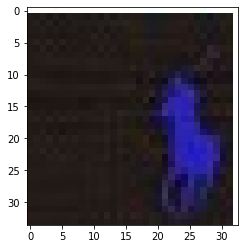

In [3]:
image = cv2.imread('/content/drive/My Drive/Warna-Ralph Lauren-3/Navy.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

RGB :  [251 254 255]


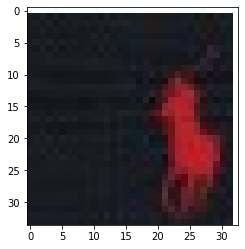

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
color1=image[0][0]
print("RGB : ", color1)
plt.imshow(image)

In [5]:
image = cv2.resize(image,(33,33))

In [6]:
print(image[0])
print(len(image[26]))

[[247 250 251]
 [248 251 251]
 [247 250 252]
 [248 251 251]
 [244 247 252]
 [248 251 251]
 [246 249 252]
 [248 251 251]
 [248 251 251]
 [248 251 251]
 [246 249 252]
 [248 251 251]
 [248 251 252]
 [248 251 251]
 [247 250 252]
 [247 250 251]
 [247 251 252]
 [250 251 251]
 [251 250 251]
 [251 250 247]
 [250 251 247]
 [247 251 251]
 [250 251 252]
 [249 249 252]
 [247 250 252]
 [245 250 252]
 [247 251 251]
 [244 249 244]
 [251 251 247]
 [251 249 250]
 [248 251 251]
 [247 251 252]
 [254 255 255]]
33


**Tabel matriks dari gambar contoh**

yang diubah x dan y nya aja
increment y dulu, baru x.

x : array ke -

---

y : baris ke -

---

z : kolom ke -

In [7]:
print(image)

[[[247 250 251]
  [248 251 251]
  [247 250 252]
  ...
  [248 251 251]
  [247 251 252]
  [254 255 255]]

 [[ 25  28  33]
  [ 22  25  30]
  [ 28  32  37]
  ...
  [ 22  27  31]
  [ 26  31  37]
  [254 255 255]]

 [[ 24  27  32]
  [ 28  31  36]
  [ 22  25  30]
  ...
  [ 28  33  39]
  [ 23  31  36]
  [254 255 255]]

 ...

 [[ 21  24  31]
  [ 21  24  31]
  [ 22  25  32]
  ...
  [ 29  23  36]
  [ 29  21  34]
  [255 254 255]]

 [[ 26  29  38]
  [ 26  29  38]
  [ 26  29  38]
  ...
  [ 20  20  30]
  [ 26  25  33]
  [255 255 255]]

 [[ 24  27  36]
  [ 24  27  36]
  [ 24  27  36]
  ...
  [ 22  25  34]
  [ 31  31  39]
  [255 255 255]]]


In [8]:
image[1][1][2]

30

In [9]:
len(image)

33

In [10]:
image.shape

(33, 33, 3)

# **Pembuatan Histogram**

**Histogram Red**

In [11]:
red =[]
for i in range(0,len(image)):
  for j in range(0,len(image)):
    #for k in range(1):
    nred = image[i][j][0]
    print(nred)
    red.append(nred)

len(red)

247
248
247
248
244
248
246
248
248
248
246
248
248
248
247
247
247
250
251
251
250
247
250
249
247
245
247
244
251
251
248
247
254
25
22
28
20
27
19
26
24
23
20
26
19
29
21
28
24
24
25
30
30
26
24
26
25
24
26
17
26
24
32
22
26
254
24
28
22
29
19
26
22
27
26
27
26
28
26
29
29
30
24
26
31
32
28
26
28
28
29
24
26
27
31
29
28
23
254
25
24
28
23
25
22
25
25
21
25
22
27
20
25
22
24
21
23
30
31
28
25
27
26
25
22
28
26
32
26
25
18
254
22
23
25
22
23
20
22
23
23
23
29
23
29
21
26
21
17
19
26
28
25
23
23
22
21
25
24
31
25
30
20
20
254
25
28
25
30
23
27
23
26
22
23
25
26
26
25
23
20
21
22
30
31
29
26
26
26
21
25
23
24
32
30
20
23
254
23
22
28
22
26
19
24
21
22
25
21
27
22
26
21
20
19
20
26
27
23
21
22
22
23
26
25
23
47
40
26
26
254
24
26
25
28
23
25
23
25
25
23
26
21
26
22
23
19
19
19
26
25
19
20
21
24
20
28
18
30
43
42
22
24
254
23
24
25
27
27
26
26
26
25
27
28
27
26
26
25
22
25
21
30
25
19
22
27
29
31
29
29
38
36
27
27
28
255
22
22
22
22
21
21
22
23
22
24
25
24
23
25
25
23
28
23
28
30
23
32
38

1089

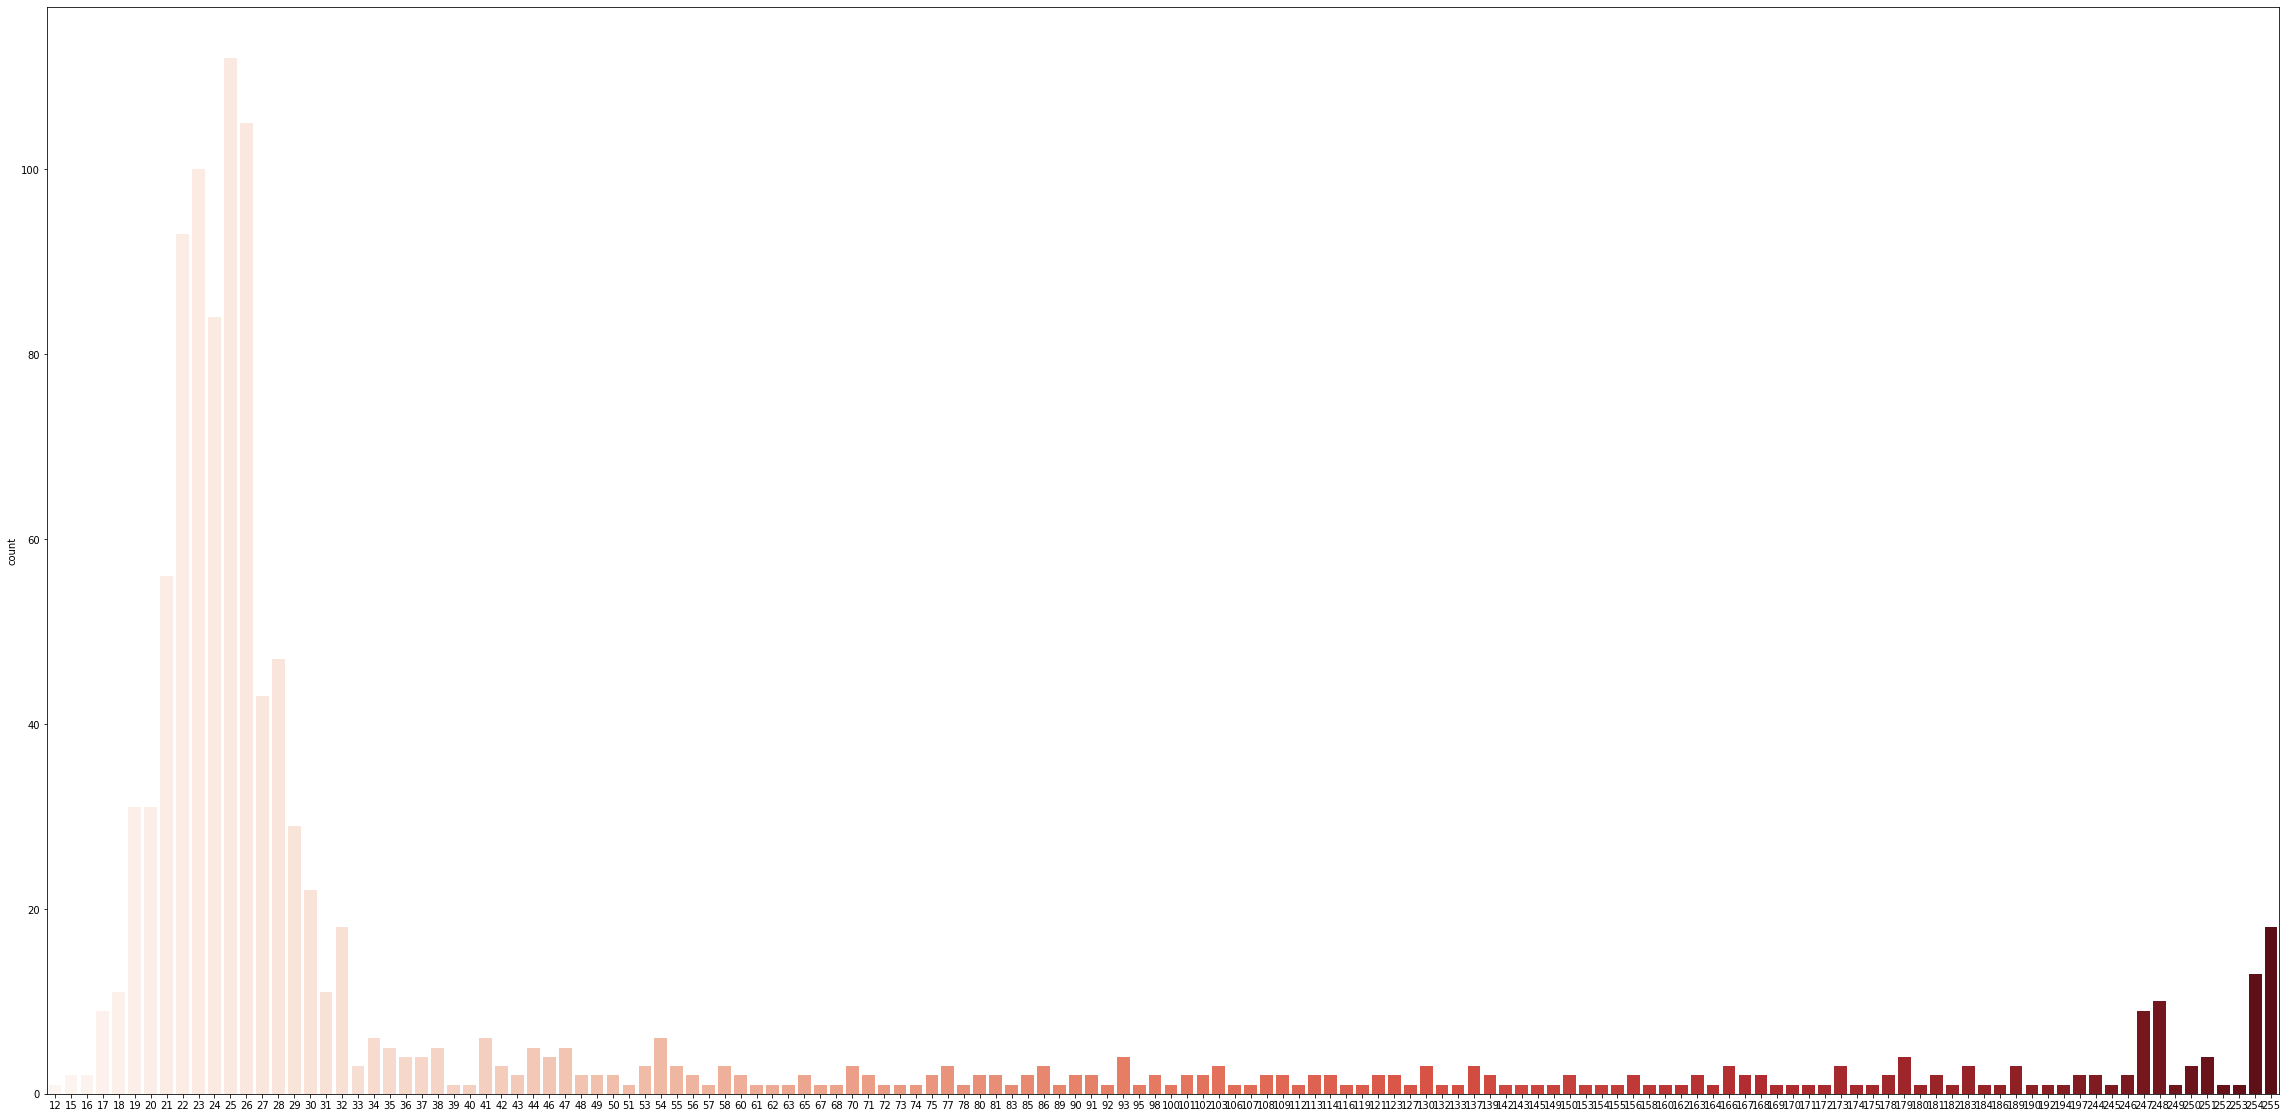

In [12]:
import seaborn as sns
plt.figure(figsize=(40,20))
sns.countplot(x=red,palette="Reds")

In [13]:
print(max(red))
print(min(red))
#ni=[]
#Counter(red)
#ni=[[ni,red.count(ni)] for ni in set(red)]
#print(ni)


255
12


In [14]:
ni = 27*27
print(ni)

729


In [15]:
from collections import Counter
r = Counter(red)
r = pd.DataFrame.from_dict(r, orient='index').reset_index()
r = r.rename(columns={'index':'red', 0:'count'})
r = r.sort_values(by=['red', 'count'])
r['h'] = r['count']/ni
r

,red,count,h
95,12,1,0.001372
84,15,2,0.002743
77,16,2,0.002743
21,17,9,0.012346
24,18,11,0.015089
...,...,...,...
5,251,4,0.005487
129,252,1,0.001372
134,253,1,0.001372
8,254,13,0.017833


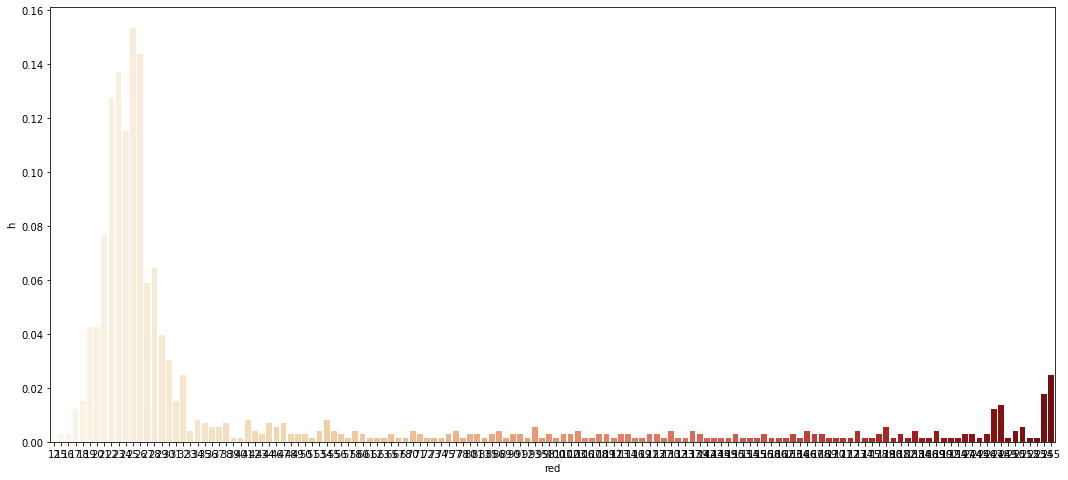

In [16]:
import seaborn as sns
plt.figure(figsize=(18,8))
sns.barplot(x=r['red'],y=r['h'],palette="OrRd")

(array([  0.,  56., 700.,  79.,  30.,  21.,   9.,  14.,  11.,  13.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <a list of 10 Patch objects>)

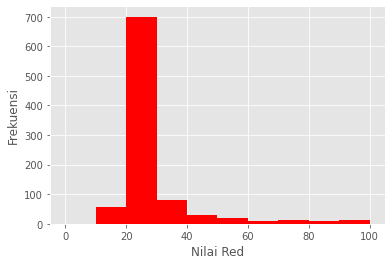

In [17]:
plt.style.use('ggplot')
bin_width = 10
sb_y = range(0,100 + bin_width,bin_width)
plt.ylabel("Frekuensi")
plt.xlabel("Nilai Red")
plt.hist(red, sb_y, color='red')

**Histogram Green**

In [18]:
green =[]
for i in range(0,len(image)):
  for j in range(0,len(image)):
    #for k in range(1):
    ngreen = image[i][j][1]
    print(ngreen)
    green.append(ngreen)

len(green)

250
251
250
251
247
251
249
251
251
251
249
251
251
251
250
250
251
251
250
250
251
251
251
249
250
250
251
249
251
249
251
251
255
28
25
32
23
29
22
29
27
26
23
29
22
32
24
31
27
28
28
26
26
28
28
26
25
27
29
23
31
20
30
27
31
255
27
31
25
32
22
29
25
30
29
30
29
31
29
33
32
36
31
31
29
28
30
30
28
28
29
26
30
29
27
26
33
31
255
28
27
30
26
29
25
28
28
24
28
25
30
23
28
25
30
33
30
28
27
28
29
28
26
25
22
31
26
26
21
30
27
255
25
26
28
25
26
23
25
26
27
26
32
26
32
24
29
29
30
29
26
24
26
26
25
24
23
28
25
31
18
25
25
29
255
28
31
28
33
26
30
26
29
25
26
28
29
29
28
26
27
34
33
29
29
30
29
28
28
24
28
24
22
25
25
25
29
255
26
25
31
24
29
22
26
25
26
28
24
30
25
29
23
25
29
28
25
25
26
26
25
25
26
30
28
22
39
32
28
31
255
27
29
28
31
26
28
26
28
28
26
29
25
29
25
26
24
27
25
25
24
24
25
24
23
19
27
20
29
35
34
22
26
255
26
27
28
30
30
29
29
29
28
30
31
30
29
29
28
26
29
25
28
24
23
26
23
21
22
24
29
37
29
19
24
27
255
25
25
25
25
25
24
25
26
25
27
28
27
26
27
28
26
31
25
26
29
25
28
22

1089

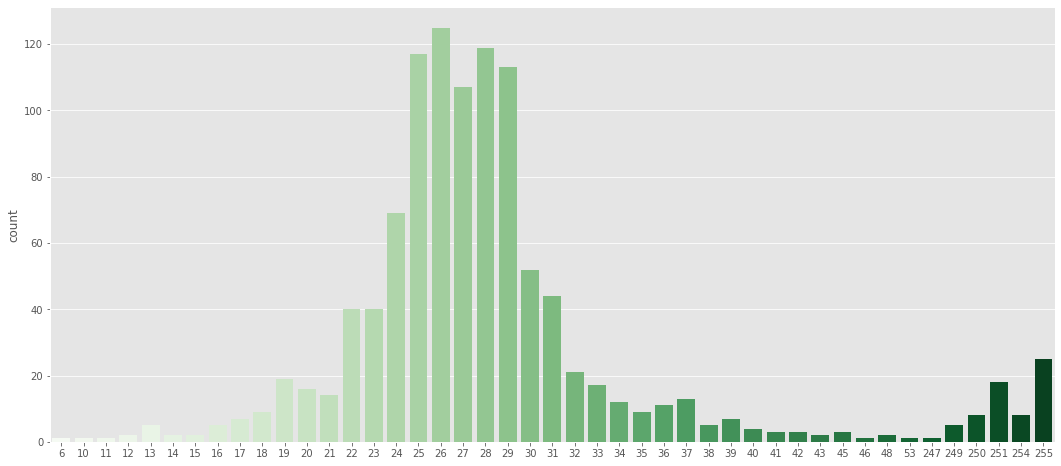

In [19]:
plt.figure(figsize=(18,8))
sns.countplot(x=green,palette="Greens")

In [20]:
print(max(green))
print(min(green))
#Counter(green)

255
6


In [21]:
from collections import Counter
g = Counter(green)
g = pd.DataFrame.from_dict(g, orient='index').reset_index()
g = g.rename(columns={'index':'green', 0:'count'})
g = g.sort_values(by=['green', 'count'])
g['h'] = g['count']/ni
g

,green,count,h
42,6,1,0.001372
41,10,1,0.001372
43,11,1,0.001372
33,12,2,0.002743
37,13,5,0.006859
29,14,2,0.002743
30,15,2,0.002743
26,16,5,0.006859
27,17,7,0.009602
20,18,9,0.012346


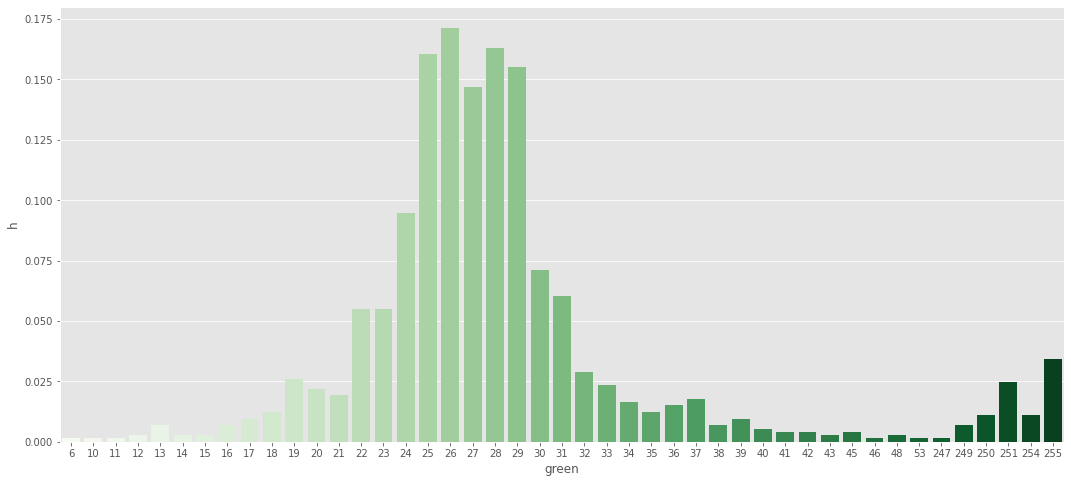

In [22]:
import seaborn as sns
plt.figure(figsize=(18,8))
sns.barplot(x=g['green'],y=g['h'],palette="Greens")

(array([  1.,  53., 760., 191.,  18.,   1.,   0.,   0.,   0.,   0.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <a list of 10 Patch objects>)

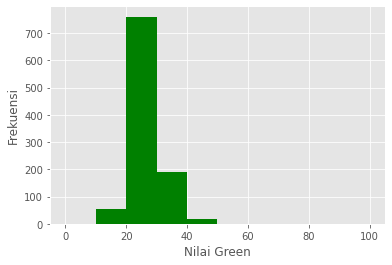

In [23]:
plt.style.use('ggplot')
bin_width = 10
sb_y = range(0,100 + bin_width,bin_width)
plt.ylabel("Frekuensi")
plt.xlabel("Nilai Green")
plt.hist(green, sb_y, color='green')

**Histogram Blue**

In [24]:
blue =[]
for i in range(0,len(image)):
  for j in range(0,len(image)):
    #for k in range(1):
    nblue = image[i][j][2]
    print(nblue)
    blue.append(nblue)

len(blue)

251
251
252
251
252
251
252
251
251
251
252
251
252
251
252
251
252
251
251
247
247
251
252
252
252
252
251
244
247
250
251
252
255
33
30
37
28
34
27
34
32
31
28
34
27
37
29
36
32
37
33
27
23
25
27
34
35
36
36
21
25
19
31
31
37
255
32
36
30
37
27
35
30
35
33
35
33
36
34
38
37
39
39
37
32
27
29
31
36
40
42
34
31
26
28
30
39
36
255
33
32
35
31
34
30
33
33
29
33
30
35
28
33
30
34
38
36
33
29
31
33
37
39
38
32
34
26
30
27
36
32
255
30
31
33
30
31
28
30
31
32
31
37
31
37
29
34
32
36
34
31
28
30
31
35
37
36
37
30
33
26
31
31
34
255
33
37
33
38
31
35
31
34
30
32
33
35
34
33
31
33
40
37
36
34
36
34
40
40
36
37
32
28
33
33
31
35
255
33
32
38
31
36
29
34
31
32
35
31
37
32
37
30
31
35
35
34
32
33
33
34
34
37
39
35
28
50
43
38
37
255
34
36
35
38
33
35
33
35
35
33
36
31
36
32
33
30
34
34
33
32
30
30
30
30
27
35
27
37
46
46
32
34
255
33
34
35
37
37
36
36
36
35
37
38
37
36
36
35
33
38
34
39
32
29
30
28
26
28
29
34
45
39
32
35
35
255
32
32
32
32
31
31
32
33
32
34
35
34
33
34
35
33
40
34
37
37
30
33
26

1089

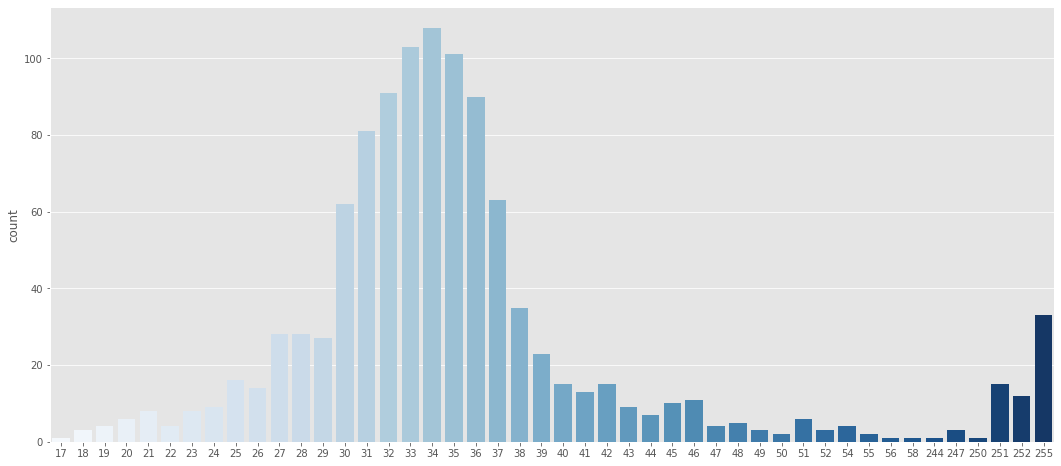

In [25]:
plt.figure(figsize=(18,8))
sns.countplot(x=blue,palette="Blues")

In [26]:
print(max(blue))
print(min(blue))
#Counter(blue)

255
17


In [27]:
from collections import Counter
b = Counter(blue)
b = pd.DataFrame.from_dict(b, orient='index').reset_index()
b = b.rename(columns={'index':'blue', 0:'count'})
b = b.sort_values(by=['blue', 'count'])
b['h'] = b['count']/ni
b

,blue,count,h
44,17,1,0.001372
33,18,3,0.004115
20,19,4,0.005487
31,20,6,0.008230
19,21,8,0.010974
41,22,4,0.005487
16,23,8,0.010974
40,24,9,0.012346
17,25,16,0.021948
25,26,14,0.019204


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text major ticklabel objects>)

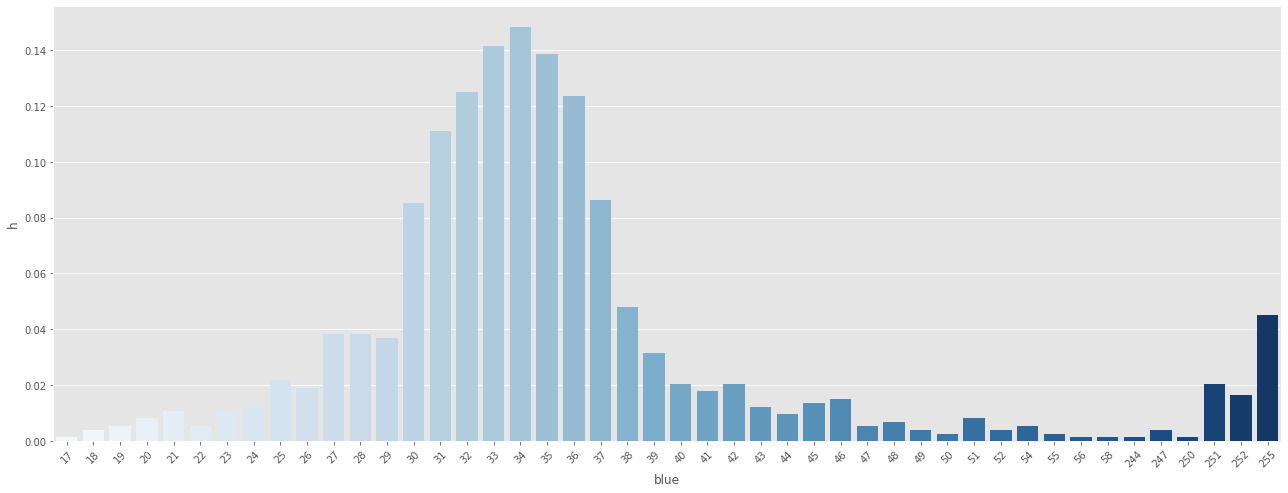

In [28]:
import seaborn as sns
plt.figure(figsize=(22,8))
g=sns.barplot(x=b['blue'],y=b['h'],palette="Blues")
plt.xticks(rotation=45)

(array([  0.,   8., 148., 757.,  92.,  19.,   0.,   0.,   0.,   0.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <a list of 10 Patch objects>)

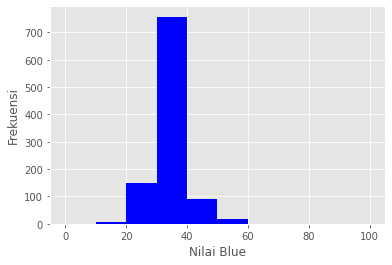

In [29]:
plt.style.use('ggplot')
bin_width = 10
sb_y = range(0,100 + bin_width,bin_width)
plt.ylabel("Frekuensi")
plt.xlabel("Nilai Blue")
plt.hist(blue, sb_y, color='blue')

# **Mencari nilai HSV**

In [30]:
def rgb_to_hsv(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = (df/mx)*100
    v = mx*100
    return h, s, v

In [31]:
#h

In [32]:
image

array([[[247, 250, 251],
        [248, 251, 251],
        [247, 250, 252],
        ...,
        [248, 251, 251],
        [247, 251, 252],
        [254, 255, 255]],

       [[ 25,  28,  33],
        [ 22,  25,  30],
        [ 28,  32,  37],
        ...,
        [ 22,  27,  31],
        [ 26,  31,  37],
        [254, 255, 255]],

       [[ 24,  27,  32],
        [ 28,  31,  36],
        [ 22,  25,  30],
        ...,
        [ 28,  33,  39],
        [ 23,  31,  36],
        [254, 255, 255]],

       ...,

       [[ 21,  24,  31],
        [ 21,  24,  31],
        [ 22,  25,  32],
        ...,
        [ 29,  23,  36],
        [ 29,  21,  34],
        [255, 254, 255]],

       [[ 26,  29,  38],
        [ 26,  29,  38],
        [ 26,  29,  38],
        ...,
        [ 20,  20,  30],
        [ 26,  25,  33],
        [255, 255, 255]],

       [[ 24,  27,  36],
        [ 24,  27,  36],
        [ 24,  27,  36],
        ...,
        [ 22,  25,  34],
        [ 31,  31,  39],
        [255, 255, 255]]

HSV :  [195.   2. 100.]


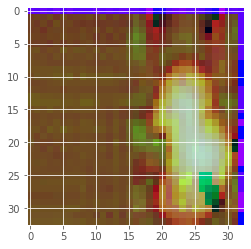

In [33]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
hsv_col = rgb_to_hsv(*color1)
hsv_col = np.round(hsv_col,0)
print('HSV : ',hsv_col)
plt.imshow(hsv_image)

HSV :  (194.9999999999999, 1.5686274509803977, 100.0)


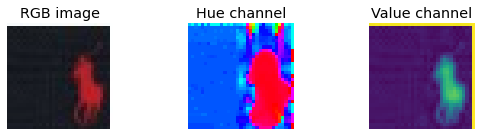

In [34]:
#from skimage import data
#from skimage.color import rgb2hsv
rgb_img = image
hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()
print('HSV : ',rgb_to_hsv(*color1))

In [35]:
import glob
from pathlib import Path

images = [cv2.imread(file) for file in glob.glob("/content/drive/My Drive/Warna-Ralph Lauren-3/*.jpg")]
print(len(images))

99


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fe1c3274950> (for post_execute):


KeyboardInterrupt: ignored

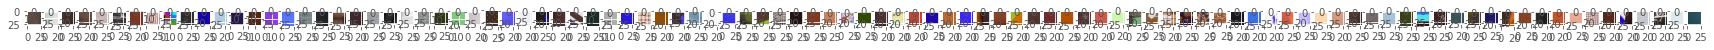

In [36]:
plt.figure(figsize=(30, 20))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [37]:
rgb = []
for frame in images:
    x=frame[0][0]
    print(x)
    rgb.append(x)

[98 77 69]
[202 199 195]
[68 43 41]
[96 68 57]
[208 193 190]
[50 45 47]
[124  52  35]
[255 230 223]
[255 196   0]
[56 52 51]
[ 20   2 163]
[180 206 223]
[36 24 76]
[92 40 24]
[141  61 228]
[ 84 113 251]
[108 120 124]
[59 55 60]
[108  75  60]
[62 39 43]
[149 150 154]
[16 16 16]
[172 170 169]
[132 137 135]
[48 54 19]
[131 199 128]
[203 198 199]
[60 41 34]
[100  96 252]
[241 240 242]
[255 254 251]
[70 40 39]
[85 64 63]
[24 42 35]
[176 176 176]
[ 43  24 223]
[180 117 109]
[148  78   1]
[72 57 61]
[135 165 184]
[252 252 252]
[ 59  51 235]
[89 93 41]
[85 57 50]
[75 64 60]
[37 19 20]
[131  59  35]
[198 133  94]
[165 149 213]
[47 74  1]
[65 41 41]
[195 188 145]
[193  71  57]
[ 38  10 177]
[187 112  60]
[ 65  43 255]
[161  76   6]
[123  54  27]
[157 183  45]
[87 59 52]
[112  42  42]
[183  82   3]
[83 53 52]
[206  91  80]
[205 244 176]
[118 111  96]
[121  88  68]
[86 59 32]
[53 22 31]
[133  99  99]
[166 104  66]
[32 32 32]
[ 63 113 227]
[235 235 235]
[211  97  74]
[202 188 254]
[254 216 174]
[21

In [38]:
rgb

[array([98, 77, 69], dtype=uint8),
 array([202, 199, 195], dtype=uint8),
 array([68, 43, 41], dtype=uint8),
 array([96, 68, 57], dtype=uint8),
 array([208, 193, 190], dtype=uint8),
 array([50, 45, 47], dtype=uint8),
 array([124,  52,  35], dtype=uint8),
 array([255, 230, 223], dtype=uint8),
 array([255, 196,   0], dtype=uint8),
 array([56, 52, 51], dtype=uint8),
 array([ 20,   2, 163], dtype=uint8),
 array([180, 206, 223], dtype=uint8),
 array([36, 24, 76], dtype=uint8),
 array([92, 40, 24], dtype=uint8),
 array([141,  61, 228], dtype=uint8),
 array([ 84, 113, 251], dtype=uint8),
 array([108, 120, 124], dtype=uint8),
 array([59, 55, 60], dtype=uint8),
 array([108,  75,  60], dtype=uint8),
 array([62, 39, 43], dtype=uint8),
 array([149, 150, 154], dtype=uint8),
 array([16, 16, 16], dtype=uint8),
 array([172, 170, 169], dtype=uint8),
 array([132, 137, 135], dtype=uint8),
 array([48, 54, 19], dtype=uint8),
 array([131, 199, 128], dtype=uint8),
 array([203, 198, 199], dtype=uint8),
 array(

In [39]:
from skimage.color import rgb2hsv
from skimage import io

In [40]:
from skimage import data_dir
coll = io.ImageCollection('/content/drive/My Drive/Warna-Ralph Lauren-3' + '/*.jpg')
print(len(coll))
abc =[]
for frame in coll:
    x=frame[0][0]
    hsv_cols = rgb_to_hsv(*x)
    #hsv_cols = np.round(hsv_cols,0)
    #print(hsv_cols)
    print(hsv_cols)
    abc.append(hsv_cols)   

99
(0, 0.0, 92.15686274509804)
(221.25, 44.44444444444444, 42.35294117647059)
(218.07692307692307, 42.97520661157025, 47.45098039215686)
(229.9270072992701, 64.92890995260663, 82.74509803921568)
(223.25581395348837, 37.391304347826086, 90.19607843137256)
(353.2919254658385, 98.77300613496934, 63.921568627450974)
(12.0, 3.246753246753235, 60.3921568627451)
(36.734693877551024, 26.630434782608692, 72.15686274509804)
(164.99999999999994, 12.121212121212132, 12.941176470588237)
(188.72727272727272, 60.43956043956044, 35.68627450980392)
(289.99999999999994, 9.836065573770492, 23.92156862745098)
(221.64705882352942, 39.7196261682243, 83.92156862745098)
(224.51612903225805, 12.204724409448819, 99.6078431372549)
(225.88235294117646, 73.91304347826086, 36.07843137254902)
(169.71428571428572, 64.81481481481482, 21.176470588235293)
(240.0, 9.448818897637794, 49.80392156862745)
(33.75, 22.22222222222222, 84.70588235294117)
(171.21951219512195, 67.21311475409836, 23.92156862745098)
(18.609625668449

In [41]:
[int(i) for i in abc[0]]

[0, 0, 92]

In [42]:
def rgb_to_hsv_h(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    '''if mx == 0:
        s = 0
    else:
        s = (df/mx)*100
    v = mx*100'''
    return h

def rgb_to_hsv_s(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = (df/mx)*100
    v = mx*100
    return s

def rgb_to_hsv_v(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = (df/mx)*100
    v = mx*100
    return v

In [43]:
abcd =[]
for frame in coll:
    x=frame[0][0]
    hsv_cols_h = rgb_to_hsv_h(*x)
    #hsv_cols = np.round(hsv_cols,0)
    #print(hsv_cols)
    print(hsv_cols_h)
    abcd.append(hsv_cols_h)   

0
221.25
218.07692307692307
229.9270072992701
223.25581395348837
353.2919254658385
12.0
36.734693877551024
164.99999999999994
188.72727272727272
289.99999999999994
221.64705882352942
224.51612903225805
225.88235294117646
169.71428571428572
240.0
33.75
171.21951219512195
18.609625668449212
43.99999999999994
232.25806451612902
208.5
250.43478260869566
347.2727272727273
252.0
353.14285714285717
230.00000000000003
208.57142857142856
264.0
233.33333333333331
234.4
48.75
354.2713567839196
240.0
225.0
243.33333333333334
245.71428571428572
238.125
224.0
228.0
45.0
176.4
122.53521126760562
205.7142857142856
228.00000000000003
0
228.53932584269663
222.42424242424244
357.39130434782606
217.5
187.05882352941174
83.33333333333331
347.4193548387097
215.43307086614172
10.419161676646695
193.1764705882353
224.1509433962264
157.8082191780822
223.84615384615384
237.27272727272728
235.55555555555554
194.9999999999999
43.75
233.8235294117647
240.0
25.714285714285722
240.0
347.5
358.46153846153845
331.2574

In [44]:
abcd2 =[]
for frame in coll:
    x=frame[0][0]
    hsv_cols_s = rgb_to_hsv_s(*x)
    #hsv_cols = np.round(hsv_cols,0)
    #print(hsv_cols)
    print(hsv_cols_s)
    abcd2.append(hsv_cols_s)

0.0
44.44444444444444
42.97520661157025
64.92890995260663
37.391304347826086
98.77300613496934
3.246753246753235
26.630434782608692
12.121212121212132
60.43956043956044
9.836065573770492
39.7196261682243
12.204724409448819
73.91304347826086
64.81481481481482
9.448818897637794
22.22222222222222
67.21311475409836
80.95238095238095
6.329113924050635
38.74999999999999
31.496062992125985
37.096774193548384
25.984251968503933
2.4630541871921094
68.62745098039215
8.653846153846152
99.32432432432434
9.999999999999993
36.73469387755102
40.7608695652174
35.555555555555564
89.23766816143498
21.656050955414017
73.2824427480916
48.64864864864865
35.59322033898306
45.070422535211264
20.000000000000004
41.17647058823529
12.903225806451612
54.347826086956516
35.678391959798994
3.465346534653467
8.928571428571422
0.0
71.77419354838709
72.26277372262773
78.29787234042553
52.52525252525252
26.15384615384615
42.857142857142854
29.245283018867923
67.91443850267379
66.53386454183267
100.0
65.4320987654321
9

In [45]:
abcd3 =[]
for frame in coll:
    x=frame[0][0]
    hsv_cols_v = rgb_to_hsv_v(*x)
    #hsv_cols = np.round(hsv_cols,0)
    #print(hsv_cols)
    print(hsv_cols_v)
    abcd3.append(hsv_cols_v)   

92.15686274509804
42.35294117647059
47.45098039215686
82.74509803921568
90.19607843137256
63.921568627450974
60.3921568627451
72.15686274509804
12.941176470588237
35.68627450980392
23.92156862745098
83.92156862745098
99.6078431372549
36.07843137254902
21.176470588235293
49.80392156862745
84.70588235294117
23.92156862745098
90.58823529411765
92.94117647058823
31.372549019607842
99.6078431372549
24.313725490196077
99.6078431372549
79.6078431372549
40.0
81.56862745098039
58.03921568627452
19.607843137254903
57.647058823529406
72.15686274509804
35.294117647058826
87.45098039215686
61.568627450980394
51.37254901960784
14.50980392156863
23.137254901960784
27.84313725490196
29.411764705882355
33.33333333333333
48.627450980392155
36.07843137254902
78.03921568627452
79.2156862745098
21.96078431372549
69.01960784313725
48.627450980392155
53.72549019607843
92.15686274509804
77.64705882352942
76.47058823529412
16.470588235294116
83.13725490196079
73.33333333333333
98.4313725490196
100.0
31.7647058

KeyboardInterrupt: ignored

# **Pembacaan Nama File**

In [ ]:
#Definisi fungsi sorting
import functools
def cmp(s, t):
    'Alter lexicographic sort order to make longer keys go *before* any of their prefixes'
    ls, lt = len(s), len(t)
    if ls < lt:   s += t[ls:] + 'x'
    elif lt < ls: t += s[lt:] + 'x'
    if s < t: return -1
    if s > t: return 1
    return 0

In [ ]:
import os
import natsort

path = '/content/drive/My Drive/Warna-Ralph Lauren-3/' 
files = [os.path.splitext(filename)[0] for filename in os.listdir(path)]
print (len(files))
#files = list(map(str.upper, files))
files=sorted(files, key=functools.cmp_to_key(cmp))
#sorted(files, key=len, reverse=True)
#files.sort(key=lambda files: (-len(files), files))
for nama in files :
    z = nama
    #print(natsort.natsorted(z,reverse=False))
    print(z)
#files=files.sort

# **Membuat File CSV**

In [ ]:
import csv

f = open('hsvsemua.csv', 'w', newline='')
csv = csv.writer(f)

for i in coll:
    x=i[0][0]
    hsv_cols = rgb_to_hsv(*x)
    data = [hsv_cols]
    csv.writerow(data)
   
f.close()

In [ ]:
import pandas as pd
df =pd.DataFrame({'Color': files, 'hsv': abc, 'hue': abcd, 'saturation': abcd2, 'brightness': abcd3, 'rgb': rgb})
df['Color'] = df['Color'].replace(to_replace= r'-', value= '/', regex=True)

In [ ]:
#df = df.explode('rgb')

In [ ]:
df

In [ ]:
print(files)

In [ ]:
df.to_excel('hsv.xlsx', index=False)

In [ ]:
df['Color'] = df['Color'].str.upper() 

In [ ]:
color = pd.DataFrame(df['Color'])
#color = color.replace(to_replace= r'-', value= '/', regex=True)
color

In [ ]:
#df['index'] = df['Color'].index
#df.tail()

# **Import Data Penjualan**

In [ ]:
#df2=pd.read_excel('/content/drive/MyDrive/last data_1.xlsx')
df2=pd.read_excel('/content/drive/MyDrive/Data-Mentah-91 warna-nike-alfa.xlsx')

In [ ]:
df2.shape

In [ ]:
df2.head()

In [ ]:
df2['Color'] = df2['Color'].str.upper() 

In [ ]:
df2.head(2)

In [ ]:
df2 = df2.iloc[2:]

In [ ]:
print(df2.shape)
df2.head(2)

In [ ]:
df2 = df2[['Ex. Factory Date', 'Model Long Descriptions', 'PO Number', 'Color', 'Total PO  Order Qty']]

In [ ]:
# df2.drop(['No','#','Region','COO','Vendor ID','Vendor','Factory Name','Board #','Brand - Merch Div','Material Group',
#           'Agent/ IMO #','Agent/ IMO Name','Product Cat','APP, ACC, FW, HM','RL Style No.','PO Number','PO Type', 'IQC, High Profile Orders, Collections/ RRL/ Purple Label, VMI',
#           'PO Destination'], axis=1, inplace=True)
#df2.drop(['No'], axis=1, inplace=True)

In [ ]:
df2.tail()

In [ ]:
df.head()

# **Proses Penggabungan Kedua File**

In [ ]:
dfinal = pd.merge(df, df2, on='Color', 
                 how='outer')

In [ ]:
dfinal['Ex. Factory Date'] = pd.to_datetime(dfinal['Ex. Factory Date'])
dfinal.head()

In [ ]:
dfinal.isna().sum()

In [ ]:
#writer = pd.ExcelWriter('/content/dfinal.xlsx')
dfinal.to_excel('dfinal.xlsx')

In [ ]:
dfinal.shape

In [ ]:
#dfinal1["Color"]  = dfinal1["Color"].str.strip()
#dfinal['Color'] = dfinal['Color'].str.rstrip()

In [ ]:
dfinal1 = dfinal[dfinal.isna().any(axis=1)]

In [ ]:
dfinal1.shape

In [ ]:
dfinal1.head()

In [ ]:
dfinal1['Color'].unique()

In [ ]:
#print(dfinal1['Color'].value_counts())
#print(len(dfinal1['Color'].value_counts()))

In [ ]:
dfinal1.shape

In [ ]:
dfinal = dfinal.dropna()

In [ ]:
dfinal

In [ ]:
dfinal.dtypes

# Visualisasi Polinomial

In [ ]:
Color1 = dfinal['Color'].value_counts().nlargest(10).index.tolist()
Color1

In [ ]:
dfinal['Color'].value_counts().nlargest(100)
#gua sampe saphire star

In [ ]:
# Aviator Navy
aviatornavy=dfinal.loc[dfinal['Color'] == 'AVIATOR NAVY']
aviatornavy.head(2)
print(aviatornavy.dtypes)

In [ ]:
aviatornavy = aviatornavy[['Ex. Factory Date','Total PO  Order Qty']]
aviatornavy

In [ ]:
aviatornavy['Datetime'] = pd.to_datetime(aviatornavy['Ex. Factory Date'])
aviatornavy = aviatornavy.set_index('Datetime')

In [ ]:
aviatornavy

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
#df_orig = pd.read_csv('datasets/elecequip.csv', parse_dates=['date'], index_col='date')

# 1. Moving Average
df_ma = aviatornavy['Total PO  Order Qty'].rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(aviatornavy['Total PO  Order Qty'], np.arange(len(aviatornavy['Total PO  Order Qty'])), frac=0.05)[:, 1], index=aviatornavy.index, columns=['Total PO  Order Qty'])
df_loess_15 = pd.DataFrame(lowess(aviatornavy['Total PO  Order Qty'], np.arange(len(aviatornavy['Total PO  Order Qty'])), frac=0.15)[:, 1], index=aviatornavy.index, columns=['Total PO  Order Qty'])

# Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(4,1, figsize=(26, 9), sharex=True, dpi=120)
aviatornavy['Total PO  Order Qty'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['Total PO  Order Qty'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['Total PO  Order Qty'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('Aviator Navy', y=0.95, fontsize=14)
plt.show()

In [ ]:
x = np.array(list(aviatornavy.index.values))
#x = np.array(list(aviatornavy['Ex. Factory Date']))
y = np.array(list(aviatornavy['Total PO  Order Qty'].values)) 
print(len(x))
print(len(y))

In [ ]:
x

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(x.min(), x.max(), num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('Aviator Navy',fontsize=20)
plt.show()

In [ ]:
avi=dict(aviatornavy.values)
#avi

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")
#create data
date_np = np.array(list(avi.keys()))
value_np = np.array(list(avi.values()))
date_num = dates.date2num(date_np)
# smooth
date_num_smooth = np.linspace(date_num.min(), date_num.max(), 100) 
spl = make_interp_spline(date_num, value_np, k=2)
value_np_smooth = spl(date_num_smooth)
# print
plt.title("Aviator Navy",fontsize=20)
plt.plot(date_np, value_np,label='Data')
plt.plot(dates.num2date(date_num_smooth), value_np_smooth,label='smooth')
plt.legend()
plt.show()

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(date_np, value_np, kind='cubic')

xnew = np.linspace(date_np.min(), date_np.max(), num=41, endpoint=True)
plt.plot(date_np, value_np, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('Polo Black',fontsize=20)
plt.show()

In [ ]:
from scipy.interpolate import make_interp_spline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime

data = {
    datetime(2016, 9, 26, 0, 0): 26060, datetime(2016, 9, 27, 0, 0): 23243,
    datetime(2016, 9, 28, 0, 0): 22534, datetime(2016, 9, 29, 0, 0): 22841,
    datetime(2016, 9, 30, 0, 0): 22441, datetime(2016, 10, 1, 0, 0): 23248 
}
#create data
date_np = np.array(list(data.keys()))
value_np = np.array(list(data.values()))
date_num = dates.date2num(date_np)
# smooth
date_num_smooth = np.linspace(date_num.min(), date_num.max(), 100) 
spl = make_interp_spline(date_num, value_np, k=3)
value_np_smooth = spl(date_num_smooth)
# print
plt.plot(date_np, value_np)
plt.plot(dates.num2date(date_num_smooth), value_np_smooth)
plt.show()


In [ ]:
#x = np.array(list(aviatornavy.index.values))
# x = np.array(list(aviatornavy['Ex. Factory Date'].values))
# y = np.array(list(aviatornavy['Total PO  Order Qty'].values))
# x = dates.date2num(x) 
# print(len(x))
# print(len(y))

#create data
date_np = np.array(list(aviatornavy['Ex. Factory Date']))
#date_np = date_np[0]
value_np = np.array(list(aviatornavy['Total PO  Order Qty'].values))
date_num = dates.date2num(date_np)


In [ ]:
date_num

In [ ]:
value_np

In [ ]:
len(date_num_smooth)

In [ ]:
smthsn = dates.num2date(date_num_smooth)
smthsn

In [ ]:
date_num_smooth = np.linspace(date_num.min(), date_num.max(), num=41, endpoint=True) 
value_np_smooth = np.poly1d(np.polyfit(date_num, value_np, 3))
#spl = make_interp_spline(date_num, value_np, k=3)
#value_np_smooth = spl(date_num_smooth)
# print
plt.plot(date_np, value_np)
#plt.plot(dates.num2date(date_num_smooth), value_np_smooth)
plt.plot(date_num_smooth, value_np_smooth)
plt.show()

In [ ]:
value_np_smooth

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")
from scipy.interpolate import interp1d

#f = interp1d(x1, y1)
#f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(x.min(), x.max(), num=41, endpoint=True)
spl = make_interp_spline(x, y, k=3)
value_np_smooth = spl(x)

plt.plot(x, y, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('Aviator Navy',fontsize=20)
plt.show()

In [ ]:
type(data)

In [ ]:
date_np

In [ ]:
# POLO BLACK
poloblack=dfinal.loc[dfinal['Color'] == 'POLO BLACK']
poloblack.head(2)

In [ ]:
x1 = np.array(list(poloblack.index.values))
y1 = np.array(list(poloblack['Total PO  Order Qty'].values)) 
print(len(x1))
print(len(y1))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x1, y1, kind='cubic')

xnew = np.linspace(x1.min(), x1.max(), num=41, endpoint=True)
plt.plot(x1, y1, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('Polo Black',fontsize=20)
plt.show()

In [ ]:
# NAVY
navy=dfinal.loc[dfinal['Color'] == 'NAVY']
navy.head(2)

In [ ]:
x2 = np.array(list(navy.index.values))
y2 = np.array(list(navy['Total PO  Order Qty'].values)) 
print(len(x2))
print(len(y2))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x2, y2, kind='cubic')

xnew = np.linspace(x2.min(), x2.max(), num=41, endpoint=True)
plt.plot(x2, y2, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('Navy',fontsize=20)
plt.show()

In [ ]:
# FRENCH NAVY
frenchnavy=dfinal.loc[dfinal['Color'] == 'FRENCH NAVY']
frenchnavy.head(2)

In [ ]:
x3 = np.array(list(frenchnavy.index.values))
y3 = np.array(list(frenchnavy['Total PO  Order Qty'].values)) 
print(len(x3))
print(len(y3))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x3, y3, kind='cubic')

xnew = np.linspace(x3.min(), x3.max(), num=41, endpoint=True)
plt.plot(x3, y3, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('French Navy',fontsize=20)
plt.show()

In [ ]:
# BLUE
blue=dfinal.loc[dfinal['Color'] == 'BLUE']
blue.head(2)

In [ ]:
x4 = np.array(list(blue.index.values))
y4 = np.array(list(blue['Total PO  Order Qty'].values)) 
print(len(x4))
print(len(y4))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x4, y4, kind='cubic')

xnew = np.linspace(x4.min(), x4.max(), num=41, endpoint=True)
plt.plot(x4, y4, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('Blue',fontsize=20)
plt.show()

In [ ]:
# BLACK
black=dfinal.loc[dfinal['Color'] == 'BLACK']
black.head(2)

In [ ]:
x5 = np.array(list(black.index.values))
y5 = np.array(list(black['Total PO  Order Qty'].values)) 
print(len(x5))
print(len(y5))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x5, y5, kind='cubic')

xnew = np.linspace(x5.min(), x5.max(), num=41, endpoint=True)
plt.plot(x5, y5, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('Black',fontsize=20)
plt.show()

In [ ]:
# MULTI
multi=dfinal.loc[dfinal['Color'] == 'MULTI']
multi.head(2)

In [ ]:
x6 = np.array(list(multi.index.values))
y6 = np.array(list(multi['Total PO  Order Qty'].values)) 
print(len(x6))
print(len(y6))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x6, y6, kind='cubic')

xnew = np.linspace(x6.min(), x6.max(), num=41, endpoint=True)
plt.plot(x6, y6, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('Multi',fontsize=20)
plt.show()

In [ ]:
# Grey
grey=dfinal.loc[dfinal['Color'] == 'GREY']
grey.head(2)

In [ ]:
x7 = np.array(list(grey.index.values))
y7 = np.array(list(grey['Total PO  Order Qty'].values)) 
print(len(x7))
print(len(y7))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x7, y7, kind='cubic')

xnew = np.linspace(x7.min(), x7.max(), num=41, endpoint=True)
plt.plot(x7, y7, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('Grey',fontsize=20)
plt.show()

In [ ]:
# White
white=dfinal.loc[dfinal['Color'] == 'WHITE']
white.head(2)

In [ ]:
x8 = np.array(list(white.index.values))
y8 = np.array(list(white['Total PO  Order Qty'].values)) 
print(len(x8))
print(len(y8))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x8, y8, kind='cubic')

xnew = np.linspace(x8.min(), x8.max(), num=41, endpoint=True)
plt.plot(x8, y8, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('White',fontsize=20)
plt.show()

In [ ]:
# Vintage Grey
vintagegrey=dfinal.loc[dfinal['Color'] == 'VINTAGE GREY']
vintagegrey.head(2)

In [ ]:
x9 = np.array(list(vintagegrey.index.values))
y9 = np.array(list(vintagegrey['Total PO  Order Qty'].values)) 
print(len(x9))
print(len(y9))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x9, y9, kind='cubic')

xnew = np.linspace(x9.min(), x9.max(), num=41, endpoint=True)
plt.plot(x9, y9, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('Vintage Grey',fontsize=20)
plt.show()

In [ ]:
# Navy Multi
navymulti=dfinal.loc[dfinal['Color'] == 'NAVY MULTI']
navymulti.head(2)

In [ ]:
x10 = np.array(list(navymulti.index.values))
y10 = np.array(list(navymulti['Total PO  Order Qty'].values)) 
print(len(x10))
print(len(y10))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x10, y10, kind='cubic')

xnew = np.linspace(x10.min(), x10.max(), num=41, endpoint=True)
plt.plot(x10, y10, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('Navy Multi',fontsize=20)
plt.show()

In [ ]:
# GREEN
green=dfinal.loc[dfinal['Color'] == 'GREEN']
green.head(2)

In [ ]:
x11 = np.array(list(green.index.values))
y11 = np.array(list(green['Total PO  Order Qty'].values)) 
print(len(x11))
print(len(y11))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x11, y11, kind='cubic')

xnew = np.linspace(x11.min(), x11.max(), num=41, endpoint=True)
plt.plot(x11, y11, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('Green',fontsize=20)
plt.show()

In [ ]:
# PURE WHT/RL2000 RED/NWPRT NVY
purewht=dfinal.loc[dfinal['Color'] == 'PURE WHT/RL2000 RED/NWPRT NVY']
purewht.head(2)

In [ ]:
x12 = np.array(list(purewht.index.values))
y12 = np.array(list(purewht['Total PO  Order Qty'].values)) 
print(len(x12))
print(len(y12))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x12, y12, kind='cubic')

xnew = np.linspace(x12.min(), x12.max(), num=41, endpoint=True)
plt.plot(x12, y12, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('PURE WHT/RL2000 RED/NWPRT NVY',fontsize=20)
plt.show()

In [ ]:
# RED
red=dfinal.loc[dfinal['Color'] == 'RED']
red.head(2)

In [ ]:
x13 = np.array(list(red.index.values))
y13 = np.array(list(red['Total PO  Order Qty'].values)) 
print(len(x13))
print(len(y13))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x13, y13, kind='cubic')

xnew = np.linspace(x13.min(), x13.max(), num=41, endpoint=True)
plt.plot(x13, y13, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('Red',fontsize=20)
plt.show()

In [ ]:
# RL 2000 RED
rl2=dfinal.loc[dfinal['Color'] == 'RL 2000 RED']
rl2.head(2)

In [ ]:
x14 = np.array(list(rl2.index.values))
y14 = np.array(list(rl2['Total PO  Order Qty'].values)) 
print(len(x14))
print(len(y14))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x14, y14, kind='cubic')

xnew = np.linspace(x14.min(), x14.max(), num=41, endpoint=True)
plt.plot(x14, y14, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('RL 2000 RED',fontsize=20)
plt.show()

In [ ]:
# COUNTRY CLUB SCENIC
ccs=dfinal.loc[dfinal['Color'] == 'COUNTRY CLUB SCENIC']
ccs.head(2)

In [ ]:
x15 = np.array(list(ccs.index.values))
y15 = np.array(list(ccs['Total PO  Order Qty'].values)) 
print(len(x15))
print(len(y15))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x15, y15, kind='cubic')

xnew = np.linspace(x15.min(), x15.max(), num=41, endpoint=True)
plt.plot(x15, y15, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('COUNTRY CLUB SCENIC',fontsize=20)
plt.show()

In [ ]:
# BLACK MULTI 
blackmulti=dfinal.loc[dfinal['Color'] == 'BLACK MULTI']
blackmulti.head(2)

In [ ]:
x16 = np.array(list(blackmulti.index.values))
y16 = np.array(list(blackmulti['Total PO  Order Qty'].values)) 
print(len(x16))
print(len(y16))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x16, y16, kind='cubic')

xnew = np.linspace(x16.min(), x16.max(), num=41, endpoint=True)
plt.plot(x16, y16, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('BLACK MULTI',fontsize=20)
plt.show()

In [ ]:
# PATRIOT RED
patriot=dfinal.loc[dfinal['Color'] == 'PATRIOT RED']
patriot.head(2)

In [ ]:
x17 = np.array(list(patriot.index.values))
y17 = np.array(list(patriot['Total PO  Order Qty'].values)) 
print(len(x17))
print(len(y17))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x17, y17, kind='cubic')

xnew = np.linspace(x17.min(), x17.max(), num=41, endpoint=True)
plt.plot(x17, y17, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('Patriot Red',fontsize=20)
plt.show()

In [ ]:
# COLLEGE GREEN
college=dfinal.loc[dfinal['Color'] == 'COLLEGE GREEN']
college.head(2)

In [ ]:
x18 = np.array(list(college.index.values))
y18 = np.array(list(college['Total PO  Order Qty'].values)) 
print(len(x18))
print(len(y18))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x18, y18, kind='cubic')

xnew = np.linspace(x18.min(), x18.max(), num=41, endpoint=True)
plt.plot(x18, y18, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('College Green',fontsize=20)
plt.show()

In [ ]:
# ROYAL BLUE/FRENCH NAVY
rylblu=dfinal.loc[dfinal['Color'] == 'ROYAL BLUE/FRENCH NAVY']
rylblu.head(2)

In [ ]:
x19 = np.array(list(rylblu.index.values))
y19 = np.array(list(rylblu['Total PO  Order Qty'].values)) 
print(len(x19))
print(len(y19))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x19, y19, kind='cubic')

xnew = np.linspace(x19.min(), x19.max(), num=41, endpoint=True)
plt.plot(x19, y19, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('ROYAL BLUE/FRENCH NAVY',fontsize=20)
plt.show()

In [ ]:
# FRENCH NAVY/PURE WHITE
frwht=dfinal.loc[dfinal['Color'] == 'FRENCH NAVY/PURE WHITE']
frwht.head(2)

In [ ]:
x20 = np.array(list(frwht.index.values))
y20 = np.array(list(frwht['Total PO  Order Qty'].values)) 
print(len(x20))
print(len(y20))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x20, y20, kind='cubic')

xnew = np.linspace(x20.min(), x20.max(), num=41, endpoint=True)
plt.plot(x20, y20, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('FRENCH NAVY/PURE WHITE',fontsize=20)
plt.show()

In [ ]:
# BLUE MULTI
blml=dfinal.loc[dfinal['Color'] == 'BLUE MULTI']
blml.head(2)

In [ ]:
x21 = np.array(list(blml.index.values))
y21 = np.array(list(blml['Total PO  Order Qty'].values)) 
print(len(x21))
print(len(y21))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x21, y21, kind='cubic')

xnew = np.linspace(x21.min(), x21.max(), num=41, endpoint=True)
plt.plot(x21, y21, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('BLUE MULTI',fontsize=20)
plt.show()

In [ ]:
# BAKER RED
bakred=dfinal.loc[dfinal['Color'] == 'BAKER RED']
bakred.head(2)

In [ ]:
x22 = np.array(list(bakred.index.values))
y22 = np.array(list(bakred['Total PO  Order Qty'].values)) 
print(len(x22))
print(len(y22))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x22, y22, kind='cubic')

xnew = np.linspace(x22.min(), x22.max(), num=41, endpoint=True)
plt.plot(x22, y22, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('BAKER RED',fontsize=20)
plt.show()

In [ ]:
# SILVER / BLACK
silbl=dfinal.loc[dfinal['Color'] == 'SILVER / BLACK']
silbl.head(2)

In [ ]:
x23 = np.array(list(silbl.index.values))
y23 = np.array(list(silbl['Total PO  Order Qty'].values)) 
print(len(x23))
print(len(y23))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x23, y23, kind='cubic')

xnew = np.linspace(x23.min(), x23.max(), num=41, endpoint=True)
plt.plot(x23, y23, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('SILVER / BLACK',fontsize=20)
plt.show()

In [ ]:
# WEST INDIES STRIPES
wst=dfinal.loc[dfinal['Color'] == 'WEST INDIES STRIPES']
wst.head(2)

In [ ]:
x24 = np.array(list(wst.index.values))
y24 = np.array(list(wst['Total PO  Order Qty'].values)) 
print(len(x24))
print(len(y24))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x24, y24, kind='cubic')

xnew = np.linspace(x24.min(), x24.max(), num=41, endpoint=True)
plt.plot(x24, y24, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('WEST INDIES STRIPES',fontsize=20)
plt.show()

In [ ]:
# BLUE ELMWOOD CAMO
blelm=dfinal.loc[dfinal['Color'] == 'BLUE ELMWOOD CAMO']
blelm.head(2)

In [ ]:
x25 = np.array(list(blelm.index.values))
y25 = np.array(list(blelm['Total PO  Order Qty'].values)) 
print(len(x25))
print(len(y25))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x25, y25, kind='cubic')

xnew = np.linspace(x25.min(), x25.max(), num=41, endpoint=True)
plt.plot(x25, y25, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('BLUE ELMWOOD CAMO',fontsize=20)
plt.show()

In [ ]:
# GREY HTR
htr=dfinal.loc[dfinal['Color'] == 'GREY HTR']
htr.head(2)

In [ ]:
x26 = np.array(list(htr.index.values))
y26 = np.array(list(htr['Total PO  Order Qty'].values)) 
print(len(x26))
print(len(y26))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x26, y26, kind='cubic')

xnew = np.linspace(x26.min(), x26.max(), num=41, endpoint=True)
plt.plot(x26, y26, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('GREY HTR',fontsize=20)
plt.show()

In [ ]:
# FRENCH NAVY/NEW IRIS BLUE 
neirs=dfinal.loc[dfinal['Color'] == 'FRENCH NAVY/NEW IRIS BLUE']
neirs.head(2)

In [ ]:
x27 = np.array(list(neirs.index.values))
y27 = np.array(list(neirs['Total PO  Order Qty'].values)) 
print(len(x27))
print(len(y27))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x27, y27, kind='cubic')

xnew = np.linspace(x27.min(), x27.max(), num=41, endpoint=True)
plt.plot(x27, y27, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('FRENCH NAVY/NEW IRIS BLUE',fontsize=20)
plt.show()

In [ ]:
# GREY MULTI 
grml=dfinal.loc[dfinal['Color'] == 'GREY MULTI']
grml.head(2)

In [ ]:
x28 = np.array(list(grml.index.values))
y28 = np.array(list(grml['Total PO  Order Qty'].values)) 
print(len(x28))
print(len(y28))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x28, y28, kind='cubic')

xnew = np.linspace(x28.min(), x28.max(), num=41, endpoint=True)
plt.plot(x28, y28, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('GREY MULTI',fontsize=20)
plt.show()

In [ ]:
# SAPPHIRE STAR
satar=dfinal.loc[dfinal['Color'] == 'SAPPHIRE STAR']
satar.head(2)

In [ ]:
x29 = np.array(list(satar.index.values))
y29 = np.array(list(satar['Total PO  Order Qty'].values)) 
print(len(x29))
print(len(y29))

In [ ]:
#Sampe sini
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

#f = interp1d(x1, y1)
f2 = interp1d(x29, y29, kind='cubic')

xnew = np.linspace(x29.min(), x29.max(), num=41, endpoint=True)
plt.plot(x29, y29, 'o', xnew, f2(xnew), '-')
#plt.plot(x, y1, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'cubic'], loc='best')
plt.title('SAPPHIRE STAR',fontsize=20)
plt.show()

In [ ]:
# AVIATOR NAVY                     170
# POLO BLACK                       154
# NAVY                             146
# FRENCH NAVY                      118
# BLUE                             100
# BLACK                             90
# MULTI                             77
# GREY                              51
# WHITE                             39
# VINTAGE GREY                      39
# NAVY MULTI                        37
# GREEN                             33
# PURE WHT/RL2000 RED/NWPRT NVY     33
# RED                               30
# RL 2000 RED                       19
# COUNTRY CLUB SCENIC               19
# BLACK MULTI                       17
# PATRIOT RED                       17
# COLLEGE GREEN                     16
# ROYAL BLUE/FRENCH NAVY            16
# FRENCH NAVY/PURE WHITE            15
# BLUE MULTI                        14
# BAKER RED                         13
# SILVER / BLACK                    13
# WEST INDIES STRIPES               12
# BLUE ELMWOOD CAMO                 12
# GREY HTR                          11
# FRENCH NAVY/NEW IRIS BLUE         10
# GREY MULTI                        10
# SAPPHIRE STAR                     10

plt.figure(figsize=(28,7))
sns.set(style="whitegrid")
from scipy.interpolate import BSpline, make_interp_spline
from scipy.interpolate import interp1d

x1=np.array(x)
y1=np.array(y)

# # 300 represents number of points to make between T.min and T.max
# xnew = np.linspace(y1.min(), y1.max(), 5)  

# spl = make_interp_spline(y1, x1, k=3)  # type: BSpline
# power_smooth = spl(xnew)

# plt.plot(xnew, power_smooth)
# plt.show()

# smooth
date_num_smooth = np.linspace(x1.min(), x1.max(), 400) 
spl = make_interp_spline(x, y, k=5)
value_np_smooth = spl(date_num_smooth)
# print
#plt.plot(x, y)
plt.title('Aviator Navy',fontsize=20)
plt.plot(date_num_smooth, value_np_smooth)
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")

coefficients = np.polyfit(x, y, 3)
#Calculate the polynomial
poly = np.poly1d(coefficients)

new_x = np.linspace(x[0], x[-1])
#Calculate new x and y values
new_y = poly(new_x)


plt.plot(x, y, "o", new_x, new_y)
#Plot the polynomial fit

plt.xlim([x[0]-1, x[-1] + 1 ])

In [ ]:
import seaborn as sns

#coefficients = np.polyfit(np.asarray().astype(float), y, 1)
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
plt.title('Aviator Navy',fontsize=20)

sns.lineplot(data=moduswarna['Total PO  Order Qty'], label='Total PO')

In [ ]:
sns.lineplot(x='Ex. Factory Date', y= 'Total PO  Order Qty', data=moduswarna, ci=None)

In [ ]:
warna10 = dfinal.loc[dfinal['Color'].isin(Color1)]

In [ ]:
import seaborn as sns

plt.figure(figsize=(22,9))
sns.set(style="whitegrid")
plt.title('Top 10')
sns.lineplot(x='Ex. Factory Date', y= 'Total PO  Order Qty', hue='Color',  data=warna10, ci=None)

In [ ]:
# za=0
# for i in range (20) :
#     za+=1
#     be = 18*za
#     print(be) 

# za=0
# for i in range (40) :
#     za+=1
#     be = 9*za
#     print(be) 

In [ ]:
# memisahkan warna
def f(row):
    if row['hue'] <= 18 :
        val = 1
    elif row['hue'] <= 36 :
        val = 2
    elif row['hue'] <= 54 :
        val = 3
    elif row['hue'] <= 72 :
        val = 4
    elif row['hue'] <= 90 :
        val = 5
    elif row['hue'] <= 108 :
        val = 6
    elif row['hue'] <= 126 :
        val = 7
    elif row['hue'] <= 144 :
        val = 8
    elif row['hue'] <= 162 :
        val = 9
    elif row['hue'] <= 180 :
        val = 10
    elif row['hue'] <= 198 :
        val = 11
    elif row['hue'] <= 216 :
        val = 12
    elif row['hue'] <= 234 :
        val = 13
    elif row['hue'] <= 252 :
        val = 14
    elif row['hue'] <= 270 :
        val = 15
    elif row['hue'] <= 288 :
        val = 16
    elif row['hue'] <= 306 :
        val = 17
    elif row['hue'] <= 324 :
        val = 18
    elif row['hue'] <= 342 :
        val = 19
    else:
        val = 20
    return val

dfinal['kelas'] = dfinal.apply(f, axis = 1)

#x_train y_train
#xtrain = tgl/bln, tahun, po
#ytrain = kelas

#dfinal

In [ ]:
# memisahkan warna part 2 
def f2(row):
    if row['hue'] <= 9 :
        val = 1.1
    elif row['hue'] <= 18 :
        val = 1.2
    elif row['hue'] <= 36 :
        val = 2.2
    elif row['hue'] <= 45 :
        val = 3.1
    elif row['hue'] <= 54 :
        val = 3.2
    elif row['hue'] <= 63 :
        val = 4.1
    elif row['hue'] <= 72 :
        val = 4.2
    elif row['hue'] <= 81 :
        val = 5.1
    elif row['hue'] <= 90 :
        val = 5.2
    elif row['hue'] <= 99 :
        val = 6.1
    elif row['hue'] <= 108 :
        val = 6.2
    elif row['hue'] <= 117 :
        val = 7.1
    elif row['hue'] <= 126 :
        val = 7.2
    elif row['hue'] <= 135 :
        val = 8.1
    elif row['hue'] <= 144 :
        val = 8.2
    elif row['hue'] <= 153 :
        val = 9.1
    elif row['hue'] <= 162 :
        val = 9.2
    elif row['hue'] <= 171 :
        val = 10.1
    elif row['hue'] <= 180 :
        val = 10.2
    elif row['hue'] <= 189 :
        val = 11.1
    elif row['hue'] <= 198 :
        val = 11.2
    elif row['hue'] <= 207 :
        val = 12.1
    elif row['hue'] <= 216 :
        val = 12.2
    elif row['hue'] <= 225 :
        val = 13.1
    elif row['hue'] <= 234 :
        val = 13.2
    elif row['hue'] <= 243 :
        val = 14.1
    elif row['hue'] <= 252 :
        val = 14.2
    elif row['hue'] <= 261 :
        val = 15.1
    elif row['hue'] <= 270 :
        val = 15.2
    elif row['hue'] <= 279 :
        val = 16.1
    elif row['hue'] <= 288 :
        val = 16.2
    elif row['hue'] <= 297 :
        val = 17.1
    elif row['hue'] <= 306 :
        val = 17.2
    elif row['hue'] <= 315 :
        val = 18.1
    elif row['hue'] <= 324 :
        val = 18.2
    elif row['hue'] <= 333 :
        val = 19.1
    elif row['hue'] <= 342 :
        val = 19.2
    elif row['hue'] <= 351 :
        val = 20.1
    else:
        val = 20.2
    return val

dfinal['kelas_2'] = dfinal.apply(f2, axis = 1)

dfinal

In [ ]:
print(dfinal['kelas'].value_counts())
print(len(dfinal['kelas'].value_counts()))

#kelas primer : 1, 2, 3, 4
#kelas sekunder : 1 = 1.1 1.2 1.3, 2 = 2.1, 2.2, 2.3 
#kelas tersier : 1.1 = 1.1.1, 1.1.2.

In [ ]:
print(dfinal['kelas_2'].value_counts())
print(len(dfinal['kelas_2'].value_counts()))

In [ ]:
print(dfinal['Color'].value_counts())
print(len(dfinal['Color'].value_counts()))

In [ ]:
dfinal['Date'] =pd.to_datetime(dfinal['Ex. Factory Date'])

In [ ]:
dfinal.sort_values(by=['Date'], inplace=True, ascending=True)

In [ ]:
#dfinal

In [ ]:
dfinal['Year'] = dfinal['Date'].dt.year
dfinal['Month'] = dfinal['Date'].dt.month

dfinal

In [ ]:
# Pembuatan Musim
def musim(row):
    if row['Month'] == 3 :
        val = 1
    elif row['Month'] == 4 :
        val = 1
    elif row['Month'] == 5 :
        val = 1
    elif row['Month'] == 6 :
        val = 2
    elif row['Month'] == 7 :
        val = 2
    elif row['Month'] == 8 :
        val = 2
    elif row['Month'] == 9 :
        val = 3
    elif row['Month'] == 10 :
        val = 3
    elif row['Month'] == 11 :
        val = 3
    elif row['Month'] == 12 :
        val = 4
    elif row['Month'] == 1 :
        val = 4
    elif row['Month'] == 2 :
        val = 4
    
    return val

dfinal['Season'] = dfinal.apply(musim, axis = 1)

dfinal

# Pembuatan Dataset

In [ ]:
dftrain = dfinal.copy()

In [ ]:
dftrain = dftrain.rename(columns={'Ex. Factory Date': 'date'})
dftrain['date'] = pd.to_datetime(dftrain.date)
dftrain['year'] = pd.DatetimeIndex(dftrain['date']).year
dftrain['month'] = pd.DatetimeIndex(dftrain['date']).month
print(dftrain)

In [ ]:
dftrain

In [ ]:
#dfa = dftrain['Model Long Descriptions'].str.contains('JACKET|JKT')
#print(dfa)

In [ ]:
#dfb = dftrain['Model Long Descriptions'].str.contains('VEST|VST')
#print(dfb)

In [ ]:
'''for i in range (len(dfa)):
    mj = dfa.astype(float)

mj'''

In [ ]:
'''for i in range (len(dfb)):
    mv = dfb.astype(float)

mv'''

In [ ]:
#dftrain.insert(10, "Model Jacket", mj)
#dftrain.insert(11, "Model Vest", mv)

In [ ]:
for i in range (len(dftrain)):
    dftrain['year'] = dftrain['year'].astype(float)

In [ ]:
for i in range (len(dftrain)):
    dftrain['month'] = dftrain['month'].astype(float)

In [ ]:
dftrain

# Warna Internasional

In [ ]:
dftrain.drop(['Model Long Descriptions','hsv','date'],axis=1, inplace=True)

In [ ]:
list_warna = ['Hitam', 'Putih', 'Abu-abu', 'Oranye', 'Kuning', 'Hijau', 'Biru', 'Ungu', 'Merah']

In [ ]:
dflw = pd.DataFrame(list_warna,columns=['Warna Internasional'])

In [ ]:
dflw

In [ ]:
a = dftrain['hue'].astype(int)
b = dftrain['saturation'].astype(int)
c = dftrain['brightness'].astype(int)

warna =[]

In [ ]:
for i in range (len(dftrain)):
    if ((a.values[i]==0) and (b.values[i]==0) and (c.values[i]<10)):
      wrn = "Hitam"
    elif ((a.values[i]==0) and (b.values[i]==0) and (c.values[i]>90)):
      wrn = "Putih"
    elif ((a.values[i]==0) and (b.values[i]==0) and (c.values[i]>=10 and c.values[i]<=90)):
      wrn = "Abu-abu"
    elif ((a.values[i]>=16) and (a.values[i]<45)):
      wrn = "Oranye"
    elif ((a.values[i]>=45) and (a.values[i]<75)):
      wrn = "Kuning"
    elif ((a.values[i]>=75) and (a.values[i]<165)):
      wrn = "Hijau"
    elif ((a.values[i]>=165) and (a.values[i]<255)):
      wrn = "Biru"
    elif ((a.values[i]>=255) and (a.values[i]<315)):
      wrn = "Ungu"
    else:
      wrn = "Merah"
    warna.append(wrn)

In [ ]:
warna

In [ ]:
dflw['index'] = dflw['Warna Internasional'].index
dflw.tail()

In [ ]:
dftrain['Warna Internasional'] = warna

In [ ]:
dftrain

In [ ]:
dftrain1 = pd.merge(dftrain,dflw, on='Warna Internasional', how='outer')

In [ ]:
dftrain

In [ ]:
dftrain1.isna().sum()

In [ ]:
dftrain.drop(['hue', 'saturation', 'brightness'],axis=1, inplace=True)

# **logistic reg**

In [ ]:
from sklearn.model_selection import train_test_split

#target_attribute = dfinal['hue']
#x = dftrain.drop('index',axis=1)
#y = dftrain['index']

train,test = train_test_split(dftrain, test_size=0.2,random_state = 42)

#x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.15,random_state = 42)'''

In [ ]:
train_X = train[['Total PO  Order Qty',	'year',	'month']]# taking the training data features
train_y=train[['hue']]# output of our training data
test_X= test[['Total PO  Order Qty',	'year',	'month']] # taking test data features
test_y =test[['hue']]   #output value of test data

In [ ]:
train_X.columns

In [ ]:
train_X.head(2)

In [ ]:
train_y.head()

In [ ]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters yang akan diuji
penalty = ['l1', 'l2']
C = np.logspace(-4,4,20)

#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(penalty=penalty, C=C)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

model = LogisticRegression(max_iter=50)

In [ ]:
clf = GridSearchCV(model, hyperparameters, cv=20)

In [ ]:
best_model = clf.fit(train_X,train_y)

In [ ]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
model.fit(train_X,train_y)

In [ ]:
prediction=best_model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

In [ ]:
# making predictions on the testing set 
y_pred = model.predict(test_X) 
   
# comparing actual response values (y_test) with predicted response values (y_pred) 
print("Logistic Regression model accuracy(in %):",  
metrics.accuracy_score(test_y, y_pred)*100) 

In [ ]:
prediction

In [ ]:
real = test_y.values.tolist()
real

In [ ]:
test_y.values

In [ ]:
pred = pd.DataFrame({'Real': real, 'Prediksi': y_pred})
pred.head(2)

In [ ]:
pred1 = pred.explode('Real')
pred1.head(2)

In [ ]:
a = pred1['Real']
b = pred1['Prediksi']

check = []

In [ ]:
for i in range (len(pred)):
    if (a.values[i]==b.values[i]):
      wrn = "True"
    else:
      wrn = "False"
    check.append(wrn)

In [ ]:
check

In [ ]:
cek = pd.DataFrame({'nilai' : check})


In [ ]:
#cek1 = cek['nilai'] = 'True'

cek['nilai'].value_counts()

In [ ]:
cek['index'] = cek['nilai'].value_counts().index

# **Menurut orang India semakin banyak kelas maka akurasi akan turun**
https://discuss.analyticsvidhya.com/t/maximum-no-of-classes-in-a-multi-classification-problem/67147/2

Solusi dengan data training yg hanya 1200 saja adalah kelasnya <10

Ceritanya manipulasi data aja cuy

#Random Forest Model

In [46]:
dataset = pd.read_excel('/content/drive/MyDrive/2017-2018-2019-2020.xlsx')
dataset

,Color,hsv,hue,saturation,brightness,rgb,minggu ke,Ex. Factory Date,Model Long Descriptions,PO Number,Total PO Order Qty,kelas,kelas_2,Date,Year,Month,Season
0,CREAM,"(43.99999999999994, 6.329113924050635, 92.9411...",44.000000,6.329114,92.941176,[203 198 199],1,2017-07-09,ALTO VST-POLY FILL-VEST,4700613285,3798,3,3.1,2017-07-09,2017,7,2
1,NAVY,"(194.9999999999999, 1.5686274509803977, 100.0)",195.000000,1.568627,100.000000,[81 42 28],2,2017-07-12,ALTO VST-POLY FILL-VEST,4700613285,9996,11,11.2,2017-07-12,2017,7,2
2,OLIVE,"(43.75, 54.54545454545454, 34.509803921568626)",43.750000,54.545455,34.509804,[187 112 60],3,2017-07-23,ALTO VST-POLY FILL-VEST,4700613286,3798,3,3.1,2017-07-23,2017,7,2
3,BLACK,"(289.99999999999994, 9.836065573770492, 23.921...",290.000000,9.836066,23.921569,[56 52 51],4,2017-07-31,FAIRWAY JKT-SYNTHETIC-JACKET,4700626516,514,17,17.1,2017-07-31,2017,7,2
4,BLACK,"(289.99999999999994, 9.836065573770492, 23.921...",290.000000,9.836066,23.921569,[56 52 51],1,2017-08-01,FAIRWAY JKT-SYNTHETIC-JACKET,4700626517,10222,17,17.1,2017-08-01,2017,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,NAVY,"(194.9999999999999, 1.5686274509803977, 100.0)",195.000000,1.568627,100.000000,[81 42 28],4,2020-11-29,AMHERST JKT-LINED-JACKET,4701196546,3084,11,11.2,2020-11-29,2020,11,3
164,NAVY,"(194.9999999999999, 1.5686274509803977, 100.0)",195.000000,1.568627,100.000000,[81 42 28],1,2020-12-03,AMHERST JKT-LINED-JACKET,4701196548,3308,11,11.2,2020-12-03,2020,12,4
165,BLUE,"(225.88235294117646, 73.91304347826086, 36.078...",225.882353,73.913043,36.078431,[36 24 76],2,2020-12-17,PAR WB-UNLINED-JACKET,4701212938,416,13,13.2,2020-12-17,2020,12,4
166,MULTI,"(193.1764705882353, 100.0, 100.0)",193.176471,100.000000,100.000000,[65 41 41],3,2020-12-24,RACING JKT-LINED-JACKET,4701214414,417,11,11.2,2020-12-24,2020,12,4


In [47]:
#@title
th2017 = pd.DataFrame(dataset, columns=['Color', 'Total PO  Order Qty', 'minggu ke', 'Ex. Factory Date', 'Year'])
th2017 = th2017[th2017.Year == 2017]
th2017

,Color,Total PO Order Qty,minggu ke,Ex. Factory Date,Year
0,CREAM,3798,1,2017-07-09,2017
1,NAVY,9996,2,2017-07-12,2017
2,OLIVE,3798,3,2017-07-23,2017
3,BLACK,514,4,2017-07-31,2017
4,BLACK,10222,1,2017-08-01,2017
5,NAVY,5044,2,2017-08-10,2017
6,RED,2000,3,2017-08-17,2017
7,SAPPHIRE STAR,1900,4,2017-08-27,2017
8,BLACK,5384,1,2017-09-01,2017
9,NAVY,4577,2,2017-09-10,2017


In [48]:
#@title
navy = th2017[th2017.Color == 'NAVY']
navy

,Color,Total PO Order Qty,minggu ke,Ex. Factory Date,Year
1,NAVY,9996,2,2017-07-12,2017
5,NAVY,5044,2,2017-08-10,2017
9,NAVY,4577,2,2017-09-10,2017
12,NAVY,545,1,2017-10-02,2017
15,NAVY,1060,4,2017-10-27,2017
19,NAVY,6355,4,2017-11-28,2017
20,NAVY,6342,1,2017-12-05,2017


In [49]:
#@title
navy.dtypes

Color                          object
Total PO  Order Qty             int64
minggu ke                       int64
Ex. Factory Date       datetime64[ns]
Year                            int64
dtype: object

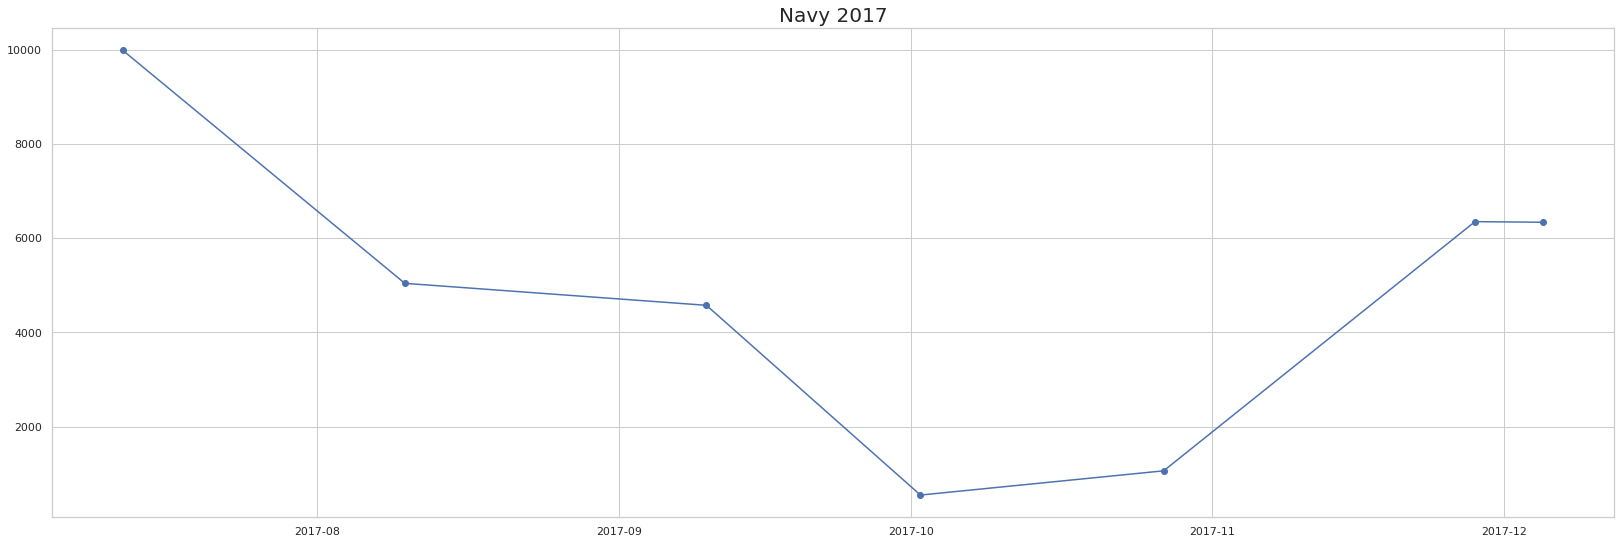

In [50]:
#@title
import seaborn as sns
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

plt.title('Navy 2017', fontsize=20)
plt.plot(navy['Ex. Factory Date'], navy['Total PO  Order Qty'])
plt.scatter(navy['Ex. Factory Date'], navy['Total PO  Order Qty'])

In [51]:
#@title
th2018 = pd.DataFrame(dataset, columns=['Color', 'Total PO  Order Qty', 'minggu ke', 'Ex. Factory Date', 'Year'])
th2018 = th2018[th2018.Year == 2018]
#th2018

In [52]:
#@title
navy2 = th2018[th2018.Color == 'NAVY']
navy2

,Color,Total PO Order Qty,minggu ke,Ex. Factory Date,Year
27,NAVY,8898,4,2018-01-28,2018
29,NAVY,3304,2,2018-02-11,2018
31,NAVY,255,4,2018-02-25,2018
33,NAVY,5525,2,2018-03-13,2018
37,NAVY,2258,2,2018-04-11,2018
42,NAVY,8413,3,2018-05-23,2018
45,NAVY,24389,2,2018-06-11,2018
48,NAVY,30,1,2018-07-01,2018
49,NAVY,130,2,2018-07-13,2018
50,NAVY,254,3,2018-07-24,2018


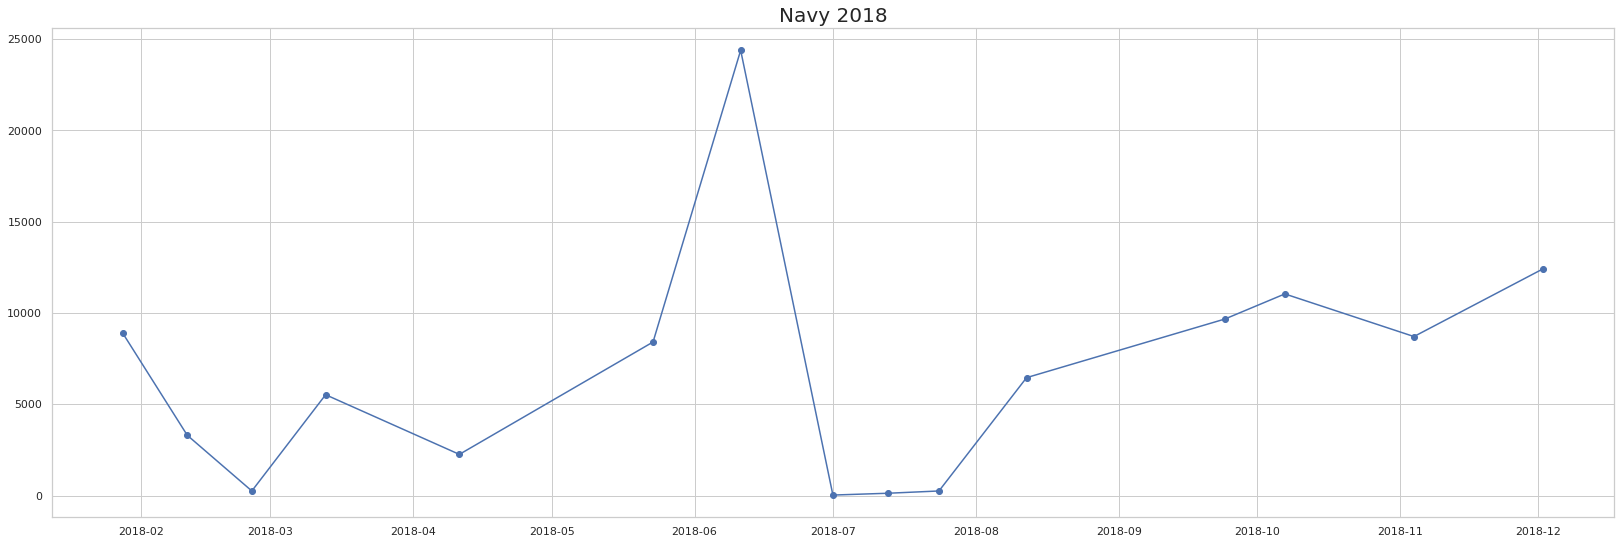

In [53]:
#@title
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

plt.title('Navy 2018', fontsize=20)
plt.plot(navy2['Ex. Factory Date'], navy2['Total PO  Order Qty'])
plt.scatter(navy2['Ex. Factory Date'], navy2['Total PO  Order Qty'])

In [54]:
#@title
th2019 = pd.DataFrame(dataset, columns=['Color', 'Total PO  Order Qty', 'minggu ke', 'Ex. Factory Date', 'Year'])
th2019 = th2019[th2019.Year == 2019]
#th2019

In [55]:
#@title
navy3 = th2019[th2019.Color == 'NAVY']
navy3

,Color,Total PO Order Qty,minggu ke,Ex. Factory Date,Year
74,NAVY,1988,3,2019-01-23,2019
76,NAVY,413,1,2019-02-05,2019
78,NAVY,521,3,2019-02-21,2019
81,NAVY,13117,2,2019-03-12,2019
84,NAVY,22523,1,2019-04-07,2019
89,NAVY,12984,2,2019-05-15,2019
94,NAVY,11150,3,2019-06-24,2019
97,NAVY,8863,2,2019-07-11,2019
100,NAVY,6634,1,2019-08-04,2019
107,NAVY,9593,4,2019-09-29,2019


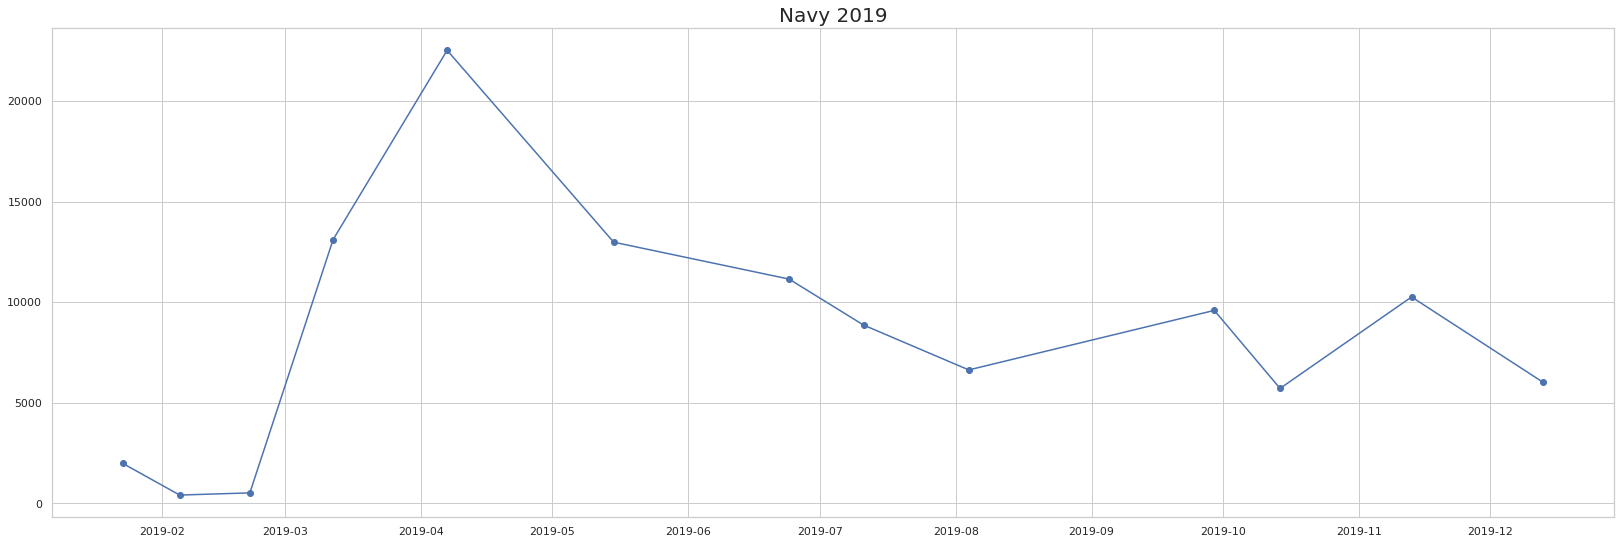

In [56]:
#@title
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

plt.title('Navy 2019', fontsize=20)
plt.plot(navy3['Ex. Factory Date'], navy3['Total PO  Order Qty'])
plt.scatter(navy3['Ex. Factory Date'], navy3['Total PO  Order Qty'])

In [57]:
#@title
th2020 = pd.DataFrame(dataset, columns=['Color', 'Total PO  Order Qty', 'minggu ke', 'Ex. Factory Date', 'Year'])
th2020 = th2020[th2020.Year == 2020]
#th2020

In [58]:
#@title
navy4 = th2020[th2020.Color == 'NAVY']
navy4

,Color,Total PO Order Qty,minggu ke,Ex. Factory Date,Year
121,NAVY,5130,2,2020-01-11,2020
125,NAVY,6766,2,2020-02-12,2020
130,NAVY,1985,3,2020-03-21,2020
135,NAVY,4800,4,2020-04-28,2020
138,NAVY,11471,3,2020-05-23,2020
143,NAVY,7213,4,2020-06-27,2020
146,NAVY,10240,3,2020-07-25,2020
150,NAVY,13109,3,2020-08-24,2020
152,NAVY,8471,1,2020-09-06,2020
156,NAVY,5376,1,2020-10-04,2020


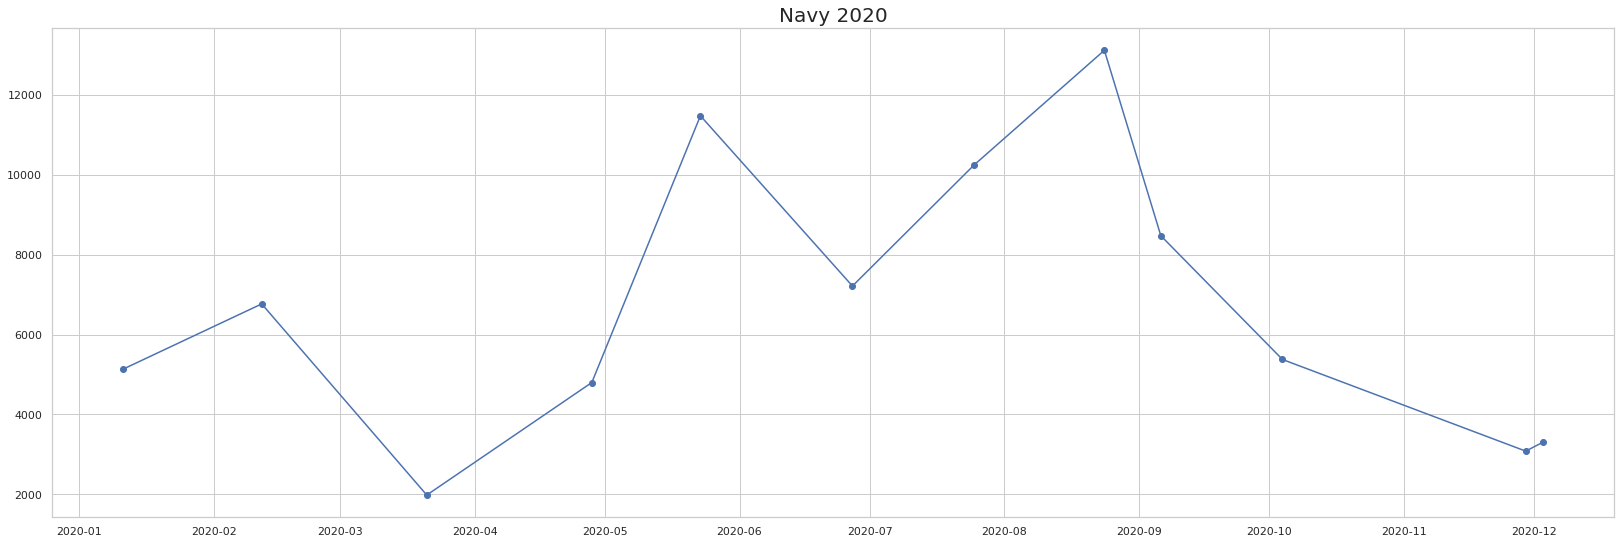

In [59]:
#@title
plt.figure(figsize=(28,9))
sns.set(style="whitegrid")

plt.title('Navy 2020', fontsize=20)
plt.plot(navy4['Ex. Factory Date'], navy4['Total PO  Order Qty'])
plt.scatter(navy4['Ex. Factory Date'], navy4['Total PO  Order Qty'])

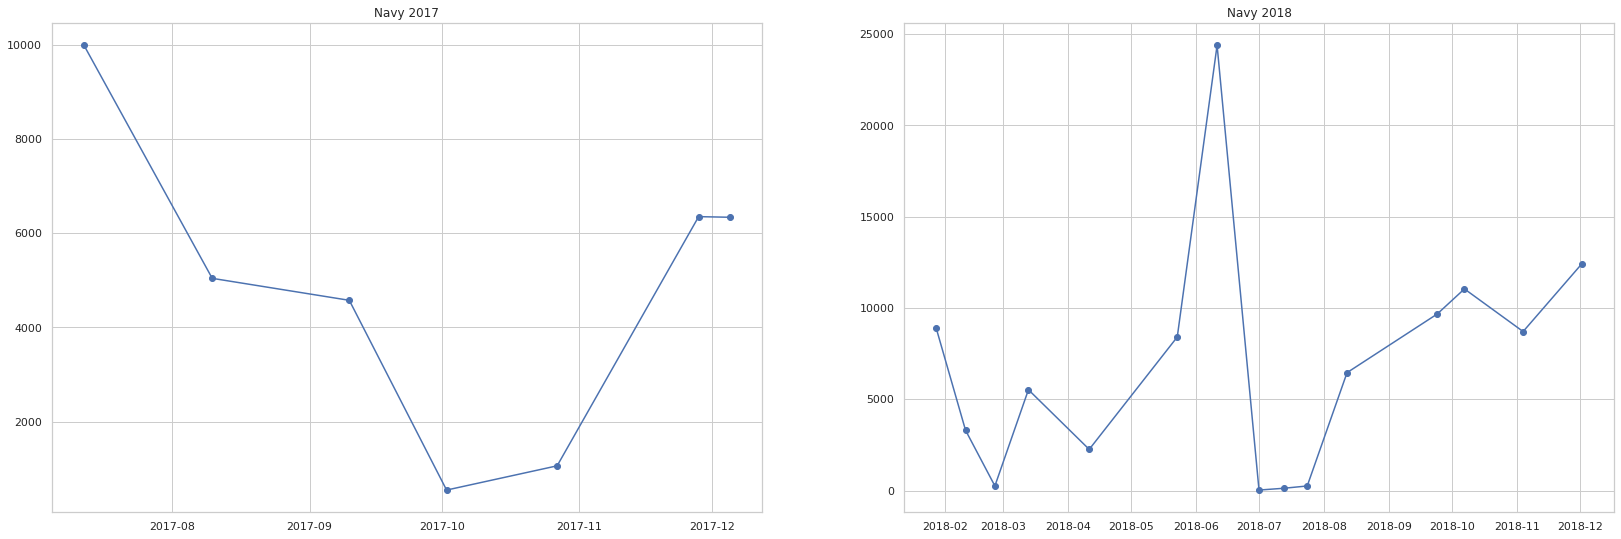

In [60]:
#@title
# 1 : 2
# 1 : 3
# 1 : 4
sns.set(style="whitegrid")
fig = plt.figure(figsize=(28, 9))
x = navy['Ex. Factory Date']
y = navy['Total PO  Order Qty']

x2 = navy2['Ex. Factory Date']
y2 = navy2['Total PO  Order Qty']

x3 = navy3['Ex. Factory Date']
y3 = navy3['Total PO  Order Qty']

x4 = navy4['Ex. Factory Date']
y4 = navy4['Total PO  Order Qty']

# Adds subplot on position 1
ax = fig.add_subplot(121)
# Adds subplot on position 2
ax2 = fig.add_subplot(122)

ax.title.set_text('Navy 2017')
ax.plot(x, y)
ax.scatter(x, y)

ax2.title.set_text('Navy 2018')
ax2.plot(x2, y2)
ax2.scatter(x2, y2)

plt.show()

# 2 : 3
# 2 : 4

# 3 : 4

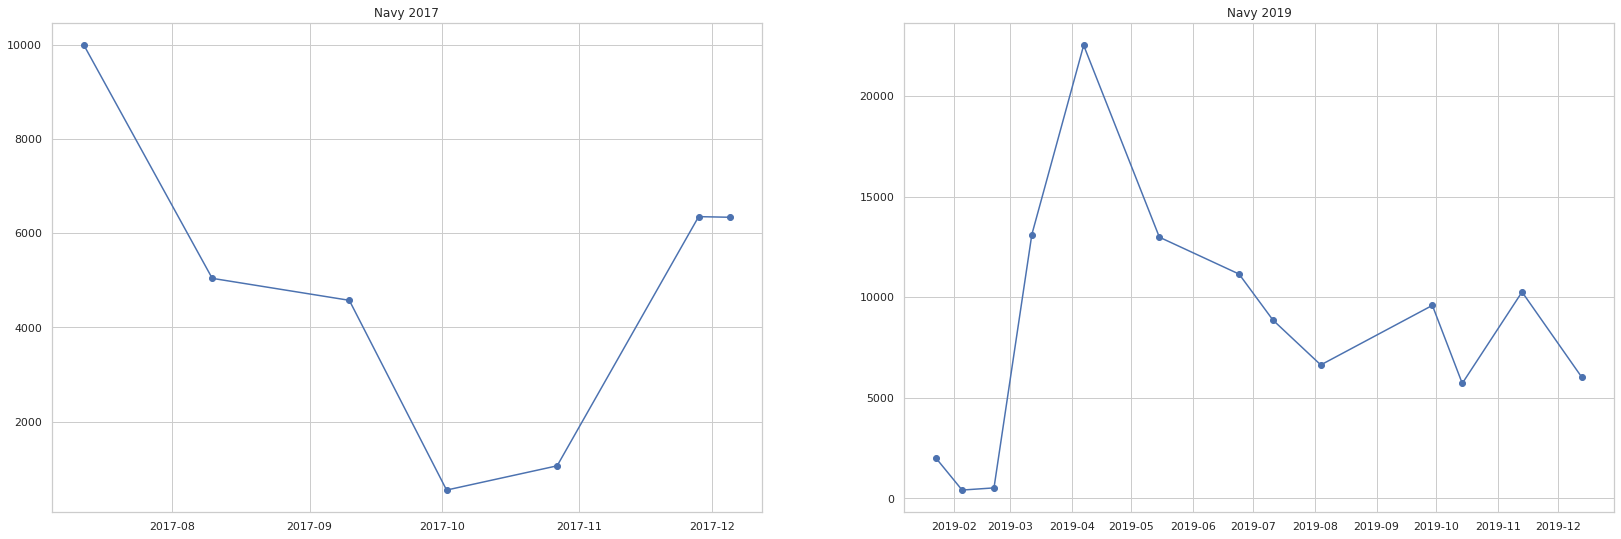

In [61]:
#@title
sns.set(style="whitegrid")
fig = plt.figure(figsize=(28, 9))
ax3 = fig.add_subplot(121)
ax4 = fig.add_subplot(122)

x3 = navy3['Ex. Factory Date']
y3 = navy3['Total PO  Order Qty']

ax3.title.set_text('Navy 2017')
ax3.plot(x, y)
ax3.scatter(x, y)

ax4.title.set_text('Navy 2019')
ax4.plot(x3, y3)
ax4.scatter(x3, y3)


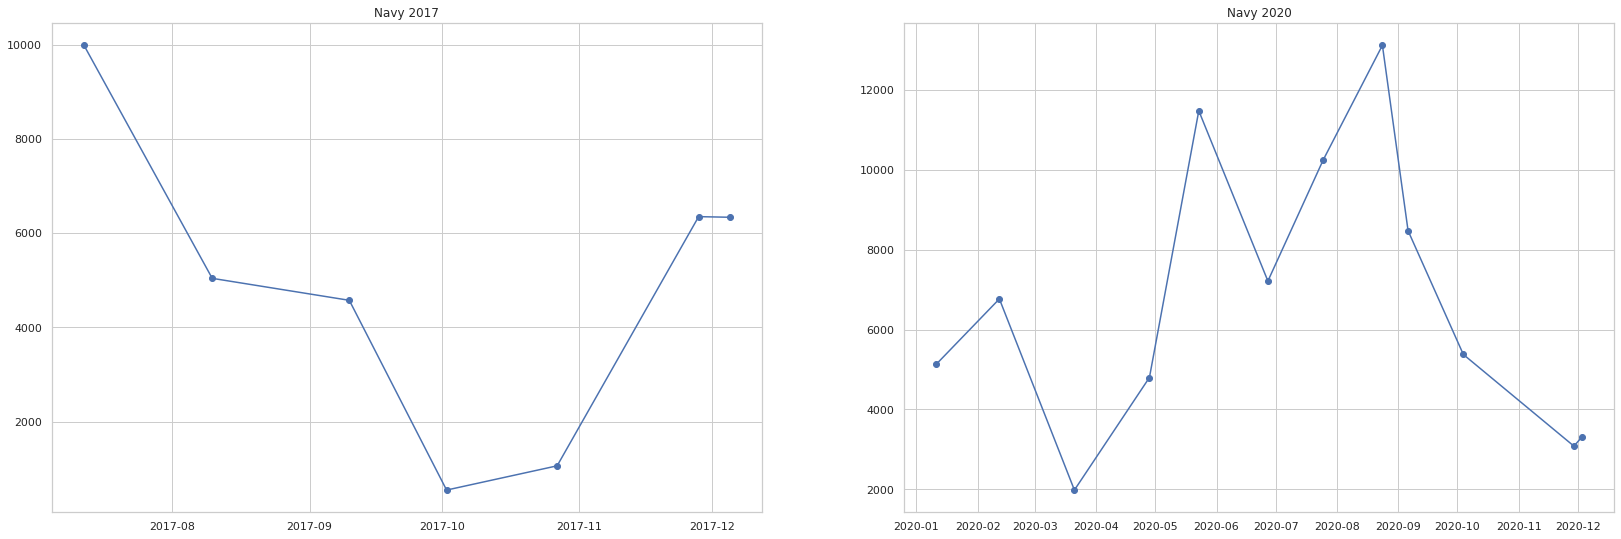

In [62]:
#@title
sns.set(style="whitegrid")
fig = plt.figure(figsize=(28, 9))
ax5 = fig.add_subplot(121)
ax6 = fig.add_subplot(122)

x4 = navy4['Ex. Factory Date']
y4 = navy4['Total PO  Order Qty']

ax5.title.set_text('Navy 2017')
ax5.plot(x, y)
ax5.scatter(x, y)

ax6.title.set_text('Navy 2020')
ax6.plot(x4, y4)
ax6.scatter(x4, y4)

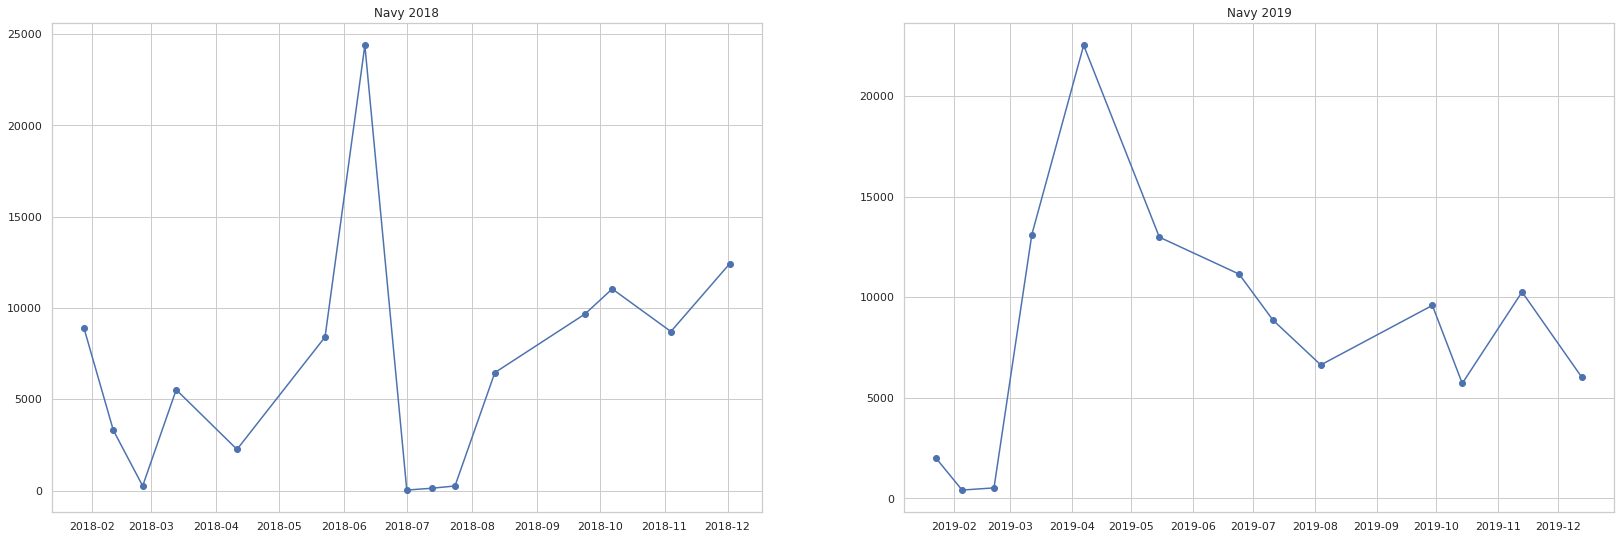

In [63]:
#@title
sns.set(style="whitegrid")
fig = plt.figure(figsize=(28, 9))
ax7 = fig.add_subplot(121)
ax8 = fig.add_subplot(122)

ax7.title.set_text('Navy 2018')
ax7.plot(x2, y2)
ax7.scatter(x2, y2)

ax8.title.set_text('Navy 2019')
ax8.plot(x3, y3)
ax8.scatter(x3, y3)

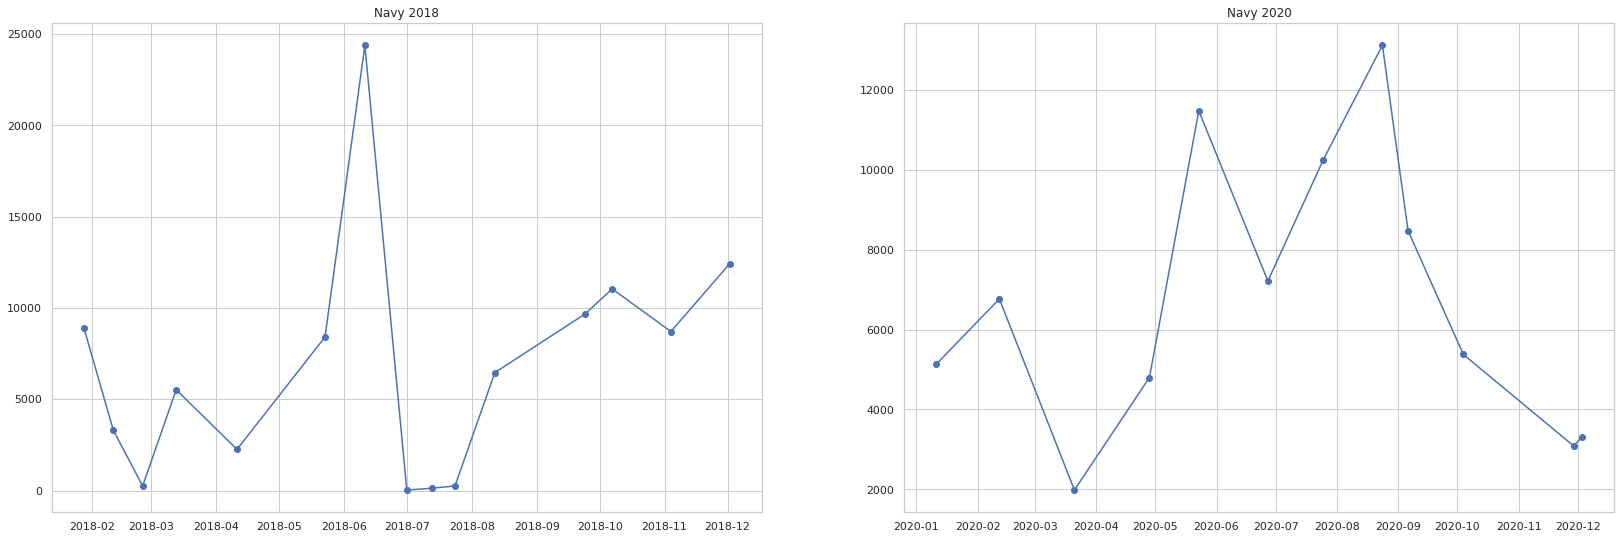

In [64]:
#@title
sns.set(style="whitegrid")
fig = plt.figure(figsize=(28, 9))
ax9 = fig.add_subplot(121)
ax10 = fig.add_subplot(122)

ax9.title.set_text('Navy 2018')
ax9.plot(x2, y2)
ax9.scatter(x2, y2)

ax10.title.set_text('Navy 2020')
ax10.plot(x4, y4)
ax10.scatter(x4, y4)

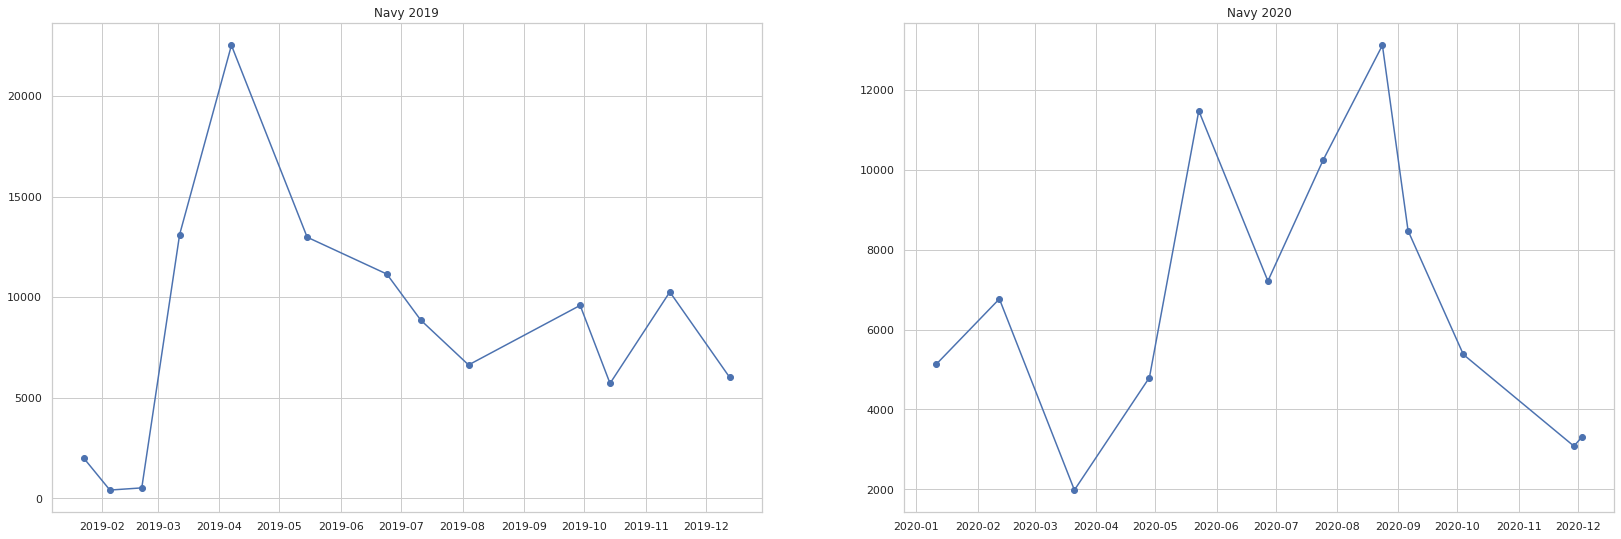

In [65]:
#@title
sns.set(style="whitegrid")
fig = plt.figure(figsize=(28, 9))
ax11 = fig.add_subplot(121)
ax12 = fig.add_subplot(122)

ax11.title.set_text('Navy 2019')
ax11.plot(x3, y3)
ax11.scatter(x3, y3)

ax12.title.set_text('Navy 2020')
ax12.plot(x4, y4)
ax12.scatter(x4, y4)

# Neunet

In [66]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [67]:
x = dataset.drop(columns=['Color','hsv','kelas_2','Model Long Descriptions','PO Number','rgb','Ex. Factory Date','hue','Color','Date'])
y = dataset['hue']

In [68]:
y

0       44.000000
1      195.000000
2       43.750000
3      290.000000
4      290.000000
          ...    
163    195.000000
164    195.000000
165    225.882353
166    193.176471
167      0.000000
Name: hue, Length: 168, dtype: float64

In [69]:
x

,saturation,brightness,minggu ke,Total PO Order Qty,kelas,Year,Month,Season
0,6.329114,92.941176,1,3798,3,2017,7,2
1,1.568627,100.000000,2,9996,11,2017,7,2
2,54.545455,34.509804,3,3798,3,2017,7,2
3,9.836066,23.921569,4,514,17,2017,7,2
4,9.836066,23.921569,1,10222,17,2017,8,2
...,...,...,...,...,...,...,...,...
163,1.568627,100.000000,4,3084,11,2020,11,3
164,1.568627,100.000000,1,3308,11,2020,12,4
165,73.913043,36.078431,2,416,13,2020,12,4
166,100.000000,100.000000,3,417,11,2020,12,4


In [70]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle=False)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.summary()

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [ ]:
history = model.fit(X_train, y_train, epochs=500, batch_size=50,  verbose=1, validation_split=0.1)

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, predictions, squared=False)

print(rmse)

## RF

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

In [ ]:
predictions = rf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, predictions, squared=False)

print(rmse)

In [ ]:
rmspe = rmse /100
rmspe

**dnn**

In [ ]:
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.08, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

y_pred = model.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()